### Importing all libraries and setting color palette

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(color_codes=True)
sns.set_palette('muted')

%config InlineBackend.figure_format ='retina'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Problem 1 - Wholesale Customers Analysis

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

### 1.1.  Load dataset and Explore

In [2]:
wca = pd.read_csv('Wholesale Customer.csv')
wca1 = wca.drop('Buyer/Spender', axis=1)
wca2 = wca.drop(['Buyer/Spender', 'Channel', 'Region'], axis=1)
wca

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [3]:
wca.head(10)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
5,6,Retail,Other,9413,8259,5126,666,1795,1451
6,7,Retail,Other,12126,3199,6975,480,3140,545
7,8,Retail,Other,7579,4956,9426,1669,3321,2566
8,9,Hotel,Other,5963,3648,6192,425,1716,750
9,10,Retail,Other,6006,11093,18881,1159,7425,2098


In [4]:
wca.tail(10)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
430,431,Hotel,Other,3097,4230,16483,575,241,2080
431,432,Hotel,Other,8533,5506,5160,13486,1377,1498
432,433,Hotel,Other,21117,1162,4754,269,1328,395
433,434,Hotel,Other,1982,3218,1493,1541,356,1449
434,435,Hotel,Other,16731,3922,7994,688,2371,838
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [5]:
wca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [6]:
wca.nunique()

Buyer/Spender       440
Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicatessen        403
dtype: int64

In [7]:
wca.isna().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

### 1.2 Descriptive Stats

In [8]:
wca_describe = wca.describe(include='all').T
wca_describe.to_excel('wca_describe.xlsx')
wca_describe

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440,NaN,NaN,NaN,220.5,127.161,1,110.75,220.5,330.25,440
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


### 1.3 Basic Understanding of Data

In [9]:
print('Basic understandings from the exploration of the data - ')
print(''.ljust(10) + '1. Total Number of large retailers (Total no. of records) =',wca['Buyer/Spender'].count())
print(''.ljust(10) + '2. Total number of Variables =',wca.columns.nunique())
print(''.ljust(10) + '3. Number of Categorical Variables = 2 (Channel and Region)')
print(''.ljust(15) + 'a. Retailer Channels are =', wca['Channel'].unique())
print(''.ljust(15) + 'b. Regions under consideration are =', wca['Region'].unique())

print(''.ljust(10) + '4. Number of Continuous Variables are = 7')
print(''.ljust(15) + 'a. Continuous Variables are = '.ljust(31) + 'Buyer/Spender, Fresh, Milk, Grocery, Frozen,')
print(''.ljust(46) + 'Detergents_Paper, Delicatessen')
print(''.ljust(15) + 'b. All Continuous Variables are of Data Type = Integer')
print(''.ljust(10) + '5. Product range under consideration is = Fresh, Milk, Grocery, Frozen, Detergents_Paper,')
print(''.ljust(52) + 'Delicatessen')

print('')

Basic understandings from the exploration of the data - 
          1. Total Number of large retailers (Total no. of records) = 440
          2. Total number of Variables = 9
          3. Number of Categorical Variables = 2 (Channel and Region)
               a. Retailer Channels are = ['Retail' 'Hotel']
               b. Regions under consideration are = ['Other' 'Lisbon' 'Oporto']
          4. Number of Continuous Variables are = 7
               a. Continuous Variables are =  Buyer/Spender, Fresh, Milk, Grocery, Frozen,
                                              Detergents_Paper, Delicatessen
               b. All Continuous Variables are of Data Type = Integer
          5. Product range under consideration is = Fresh, Milk, Grocery, Frozen, Detergents_Paper,
                                                    Delicatessen



### 1.4 More In-depth Understanding of Data

In [10]:
print('More in-depth understanding of the data -')
print(''.ljust(10) + '1. The distribution of retailers according to Channels is-')
print(''.ljust(15) + 'Hotel - 298')
print(''.ljust(15) + 'Retail - 142')

print(''.ljust(10) + '2. The distribution of retailers according to Region is-')
print(''.ljust(15) + 'Lisbon - 77')
print(''.ljust(15) + 'Oporto - 47')
print(''.ljust(15) + 'Other - 316')

print(''.ljust(10) + '3. The Average and Median annual spend (rounded) per product is-')
print(''.ljust(15) + 'Fresh --->   Average = %6d,  Median = %6d   [{1}]'.format('Left Skewed','Right Skewed') %(round(wca['Fresh'].mean()), round(wca['Fresh'].median())))
print(''.ljust(15) + 'Milk --->   Average = %6d,  Median = %6d   [{1}]'.format('Left Skewed','Right Skewed') %(round(wca['Milk'].mean()), round(wca['Milk'].median())))
print(''.ljust(15) + 'Grocery --->   Average = %6d,  Median = %6d   [{1}]'.format('Left Skewed','Right Skewed') %(round(wca['Grocery'].mean()), round(wca['Grocery'].median())))
print(''.ljust(15) + 'Frozen --->   Average = %6d,  Median = %6d   [{1}]'.format('Left Skewed','Right Skewed') %(round(wca['Frozen'].mean()), round(wca['Frozen'].median())))
print(''.ljust(15) + 'Detergents_Paper --->   Average = %6d,  Median = %6d   [{1}]'.format('Left Skewed','Right Skewed') %(round(wca['Detergents_Paper'].mean()), round(wca['Detergents_Paper'].median())))
print(''.ljust(15) + 'Delicatessan --->   Average = %6d,  Median = %6d   [{1}]'.format('Left Skewed','Right Skewed') %(round(wca['Delicatessen'].mean()), round(wca['Delicatessen'].median())))


More in-depth understanding of the data -
          1. The distribution of retailers according to Channels is-
               Hotel - 298
               Retail - 142
          2. The distribution of retailers according to Region is-
               Lisbon - 77
               Oporto - 47
               Other - 316
          3. The Average and Median annual spend (rounded) per product is-
               Fresh --->   Average =  12000,  Median =   8504   [Right Skewed]
               Milk --->   Average =   5796,  Median =   3627   [Right Skewed]
               Grocery --->   Average =   7951,  Median =   4756   [Right Skewed]
               Frozen --->   Average =   3072,  Median =   1526   [Right Skewed]
               Detergents_Paper --->   Average =   2881,  Median =    816   [Right Skewed]
               Delicatessan --->   Average =   1525,  Median =    966   [Right Skewed]


### 1.5 Exploring Region and Channel wise

In [11]:
# Mean Annual Spend by Region and Channel
pd.pivot_table(wca1, index=['Region', 'Channel'])

Delicatessen  Detergents_Paper         Fresh       Frozen  \
Region Channel                                                              
Lisbon Hotel     1197.152542        950.525424  12902.254237  3127.322034   
       Retail    1871.944444       8225.277778   5200.000000  2584.111111   
Oporto Hotel     1105.892857        482.714286  11650.535714  5745.035714   
       Retail    1239.000000       8410.263158   7289.789474  1540.578947   
Other  Hotel     1518.284360        786.682464  13878.052133  3656.900474   
       Retail    1826.209524       6899.238095   9831.504762  1513.200000   

                     Grocery          Milk  
Region Channel                              
Lisbon Hotel     4026.135593   3870.203390  
       Retail   18471.944444  10784.000000  
Oporto Hotel     4395.500000   2304.250000  
       Retail   16326.315789   9190.789474  
Other  Hotel     3886.734597   3486.981043  
       Retail   15953.809524  10981.009524

In [12]:
# Number of Retailers distributed Channel and Region wise
wca.groupby('Channel').nunique()
wca.groupby('Region').nunique()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,,,
Hotel,298,1,3,295,285,289,293,277,276
Retail,142,1,3,142,141,141,139,142,141


,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,,,
Lisbon,77,2,1,77,75,76,77,76,73
Oporto,47,2,1,47,46,46,47,47,46
Other,316,2,1,314,309,312,307,304,296


In [13]:
# Total Annual Spend of each product - Channel and Region wise
wca1.groupby('Channel').sum()
wca1.groupby('Region').sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


In [14]:
# Sum Total Annual Spend by each Channel and Region
wca1.groupby('Channel').sum().sum(axis=1)
wca1.groupby('Region').sum().sum(axis=1)

Channel
Hotel     7999569
Retail    6619931
dtype: int64

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
dtype: int64

### 1.6 Visualise data and look for outliers

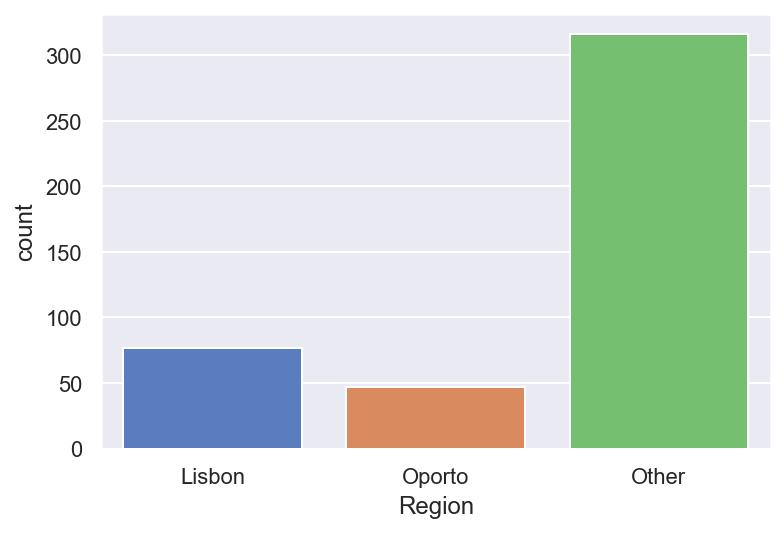

In [15]:
sns.countplot(x='Region', order=['Lisbon', 'Oporto', 'Other'],data=wca);
plt.savefig('region_countplot.jpg');

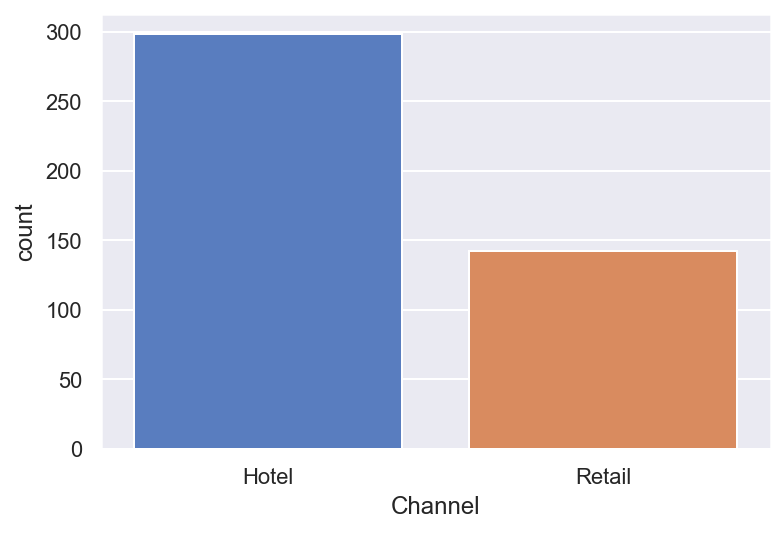

In [16]:
sns.countplot(x='Channel', order=['Hotel', 'Retail'],data=wca);
plt.savefig('channel_countplot.jpg');

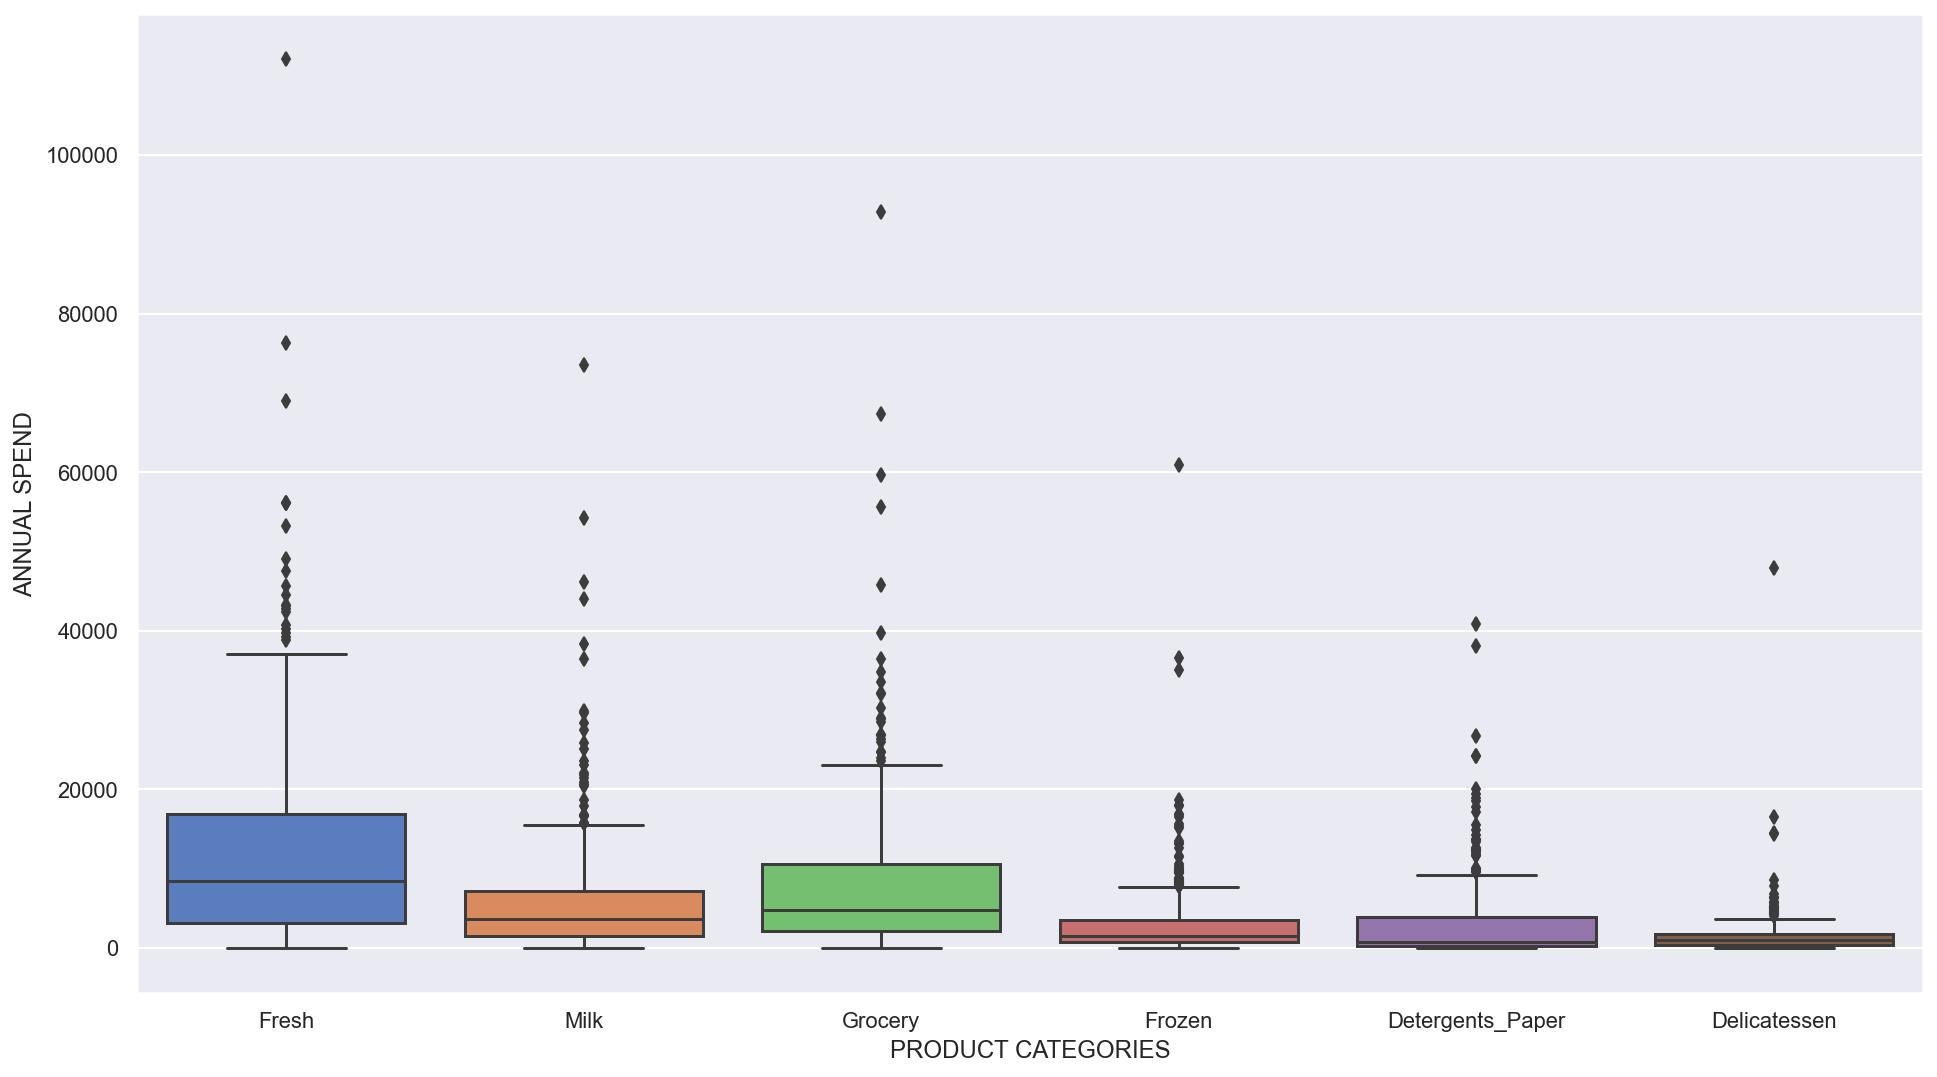

In [17]:
plt.figure(figsize=[16,9])
sns.boxplot(x='variable', y='value', data=pd.melt(wca2));

plt.xlabel('PRODUCT CATEGORIES', fontsize=12)
plt.ylabel('ANNUAL SPEND', fontsize=12)
plt.savefig('smdm_prob1_box_all_cat.jpg', bbox_inches='tight');

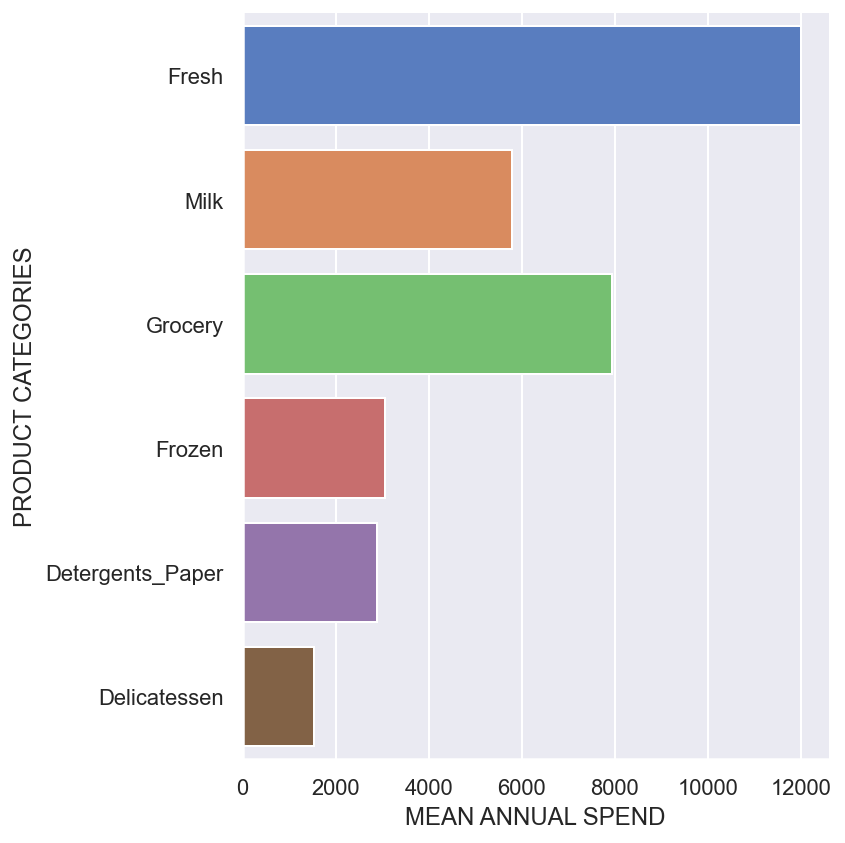

In [18]:
sns.catplot(y='variable', x='value', data=pd.melt(wca2), kind='bar', ci=False, height=6)
plt.ylabel('PRODUCT CATEGORIES', fontsize=12)
plt.xlabel('MEAN ANNUAL SPEND', fontsize=12)
plt.savefig('smdm_prob1_bar_all_cat.jpg', bbox_inches='tight');

In [19]:
wca_channel_spends = wca1.groupby('Channel').sum()
wca_region_spends =  wca1.groupby('Region').sum()

wca_channel_spends
wca_region_spends

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


In [20]:
wca_channel_spends['Channel Spends'] = wca_channel_spends.sum(axis=1)
#wca_channel_spends.loc['Total Product Spend',:] = wca_channel_spends.sum(axis=0)
wca_region_spends['Region Spends'] = wca_region_spends.sum(axis=1)
#wca_region_spends.loc['Total Product Spends',:] = wca_region_spends.sum(axis=0)
wca_channel_spends.reset_index(inplace=True, drop=False)
wca_region_spends.reset_index(inplace=True, drop=False)

wca_region_spends
wca_channel_spends

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Region Spends
0,Lisbon,854833,422454,570037,231026,204136,104327,2386813
1,Oporto,464721,239144,433274,190132,173311,54506,1555088
2,Other,3960577,1888759,2495251,930492,890410,512110,10677599


,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Channel Spends
0,Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569
1,Retail,1264414,1521743,2317845,234671,1032270,248988,6619931


In [21]:
## Total Annual Product Spends by Product
print('Fresh --->', wca['Fresh'].sum())
print('Grocery --->', wca['Grocery'].sum())
print('Milk --->', wca['Milk'].sum())
print('Frozen --->', wca['Frozen'].sum())
print('Detergents_Paper --->', wca['Detergents_Paper'].sum())
print('Delicatessen --->', wca['Delicatessen'].sum())

Fresh ---> 5280131
Grocery ---> 3498562
Milk ---> 2550357
Frozen ---> 1351650
Detergents_Paper ---> 1267857
Delicatessen ---> 670943


In [22]:
wca_totalspends = {'Fresh': wca['Fresh'].sum(), 'Grocery': wca['Grocery'].sum(), 'Milk': wca['Milk'].sum(), 
                  'Frozen': wca['Frozen'].sum(), 'Detergents_Paper': wca['Detergents_Paper'].sum(),
                  'Delicatessen': wca['Delicatessen'].sum()}
sum(wca_totalspends.values())
wca_totalspends

14619500

{'Fresh': 5280131,
 'Grocery': 3498562,
 'Milk': 2550357,
 'Frozen': 1351650,
 'Detergents_Paper': 1267857,
 'Delicatessen': 670943}

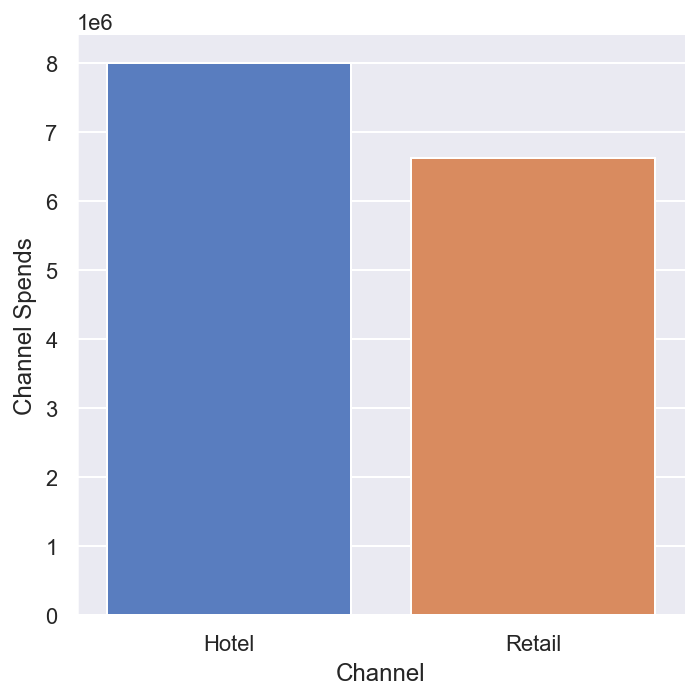

In [23]:
sns.catplot(x='Channel', y='Channel Spends', data=wca_channel_spends, kind='bar');
plt.savefig('smdm_prob1_channel_totalspends.jpg', bbox_inches='tight');

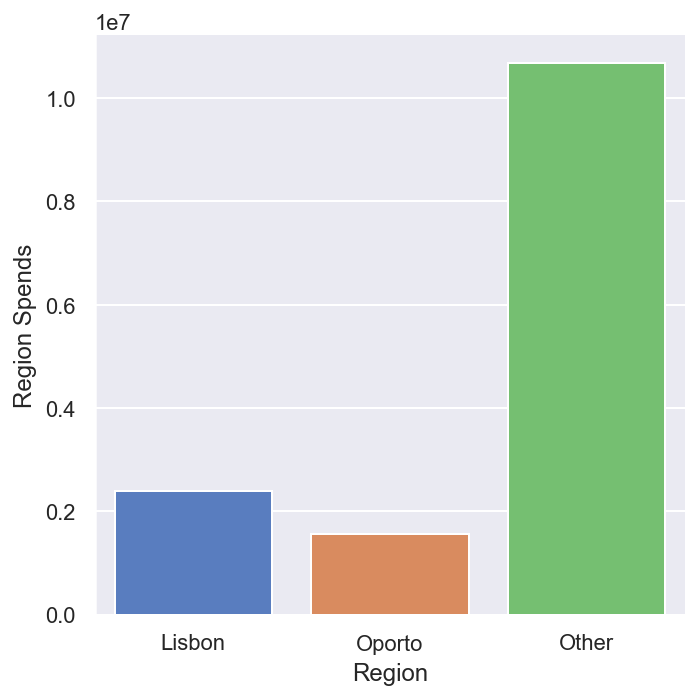

In [24]:
sns.catplot(x='Region', y='Region Spends', data=wca_region_spends, kind='bar');
plt.savefig('smdm_prob1_region_totalspends.jpg', bbox_inches='tight');

In [25]:
wca_region_channel = wca1.groupby(['Region', 'Channel']).sum().reset_index()
wca_region_channel['Total Spends'] = wca_region_channel.sum(axis=1)
wca_region_channel

,Region,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spends
0,Lisbon,Hotel,761233,228342,237542,184512,56081,70632,1538342
1,Lisbon,Retail,93600,194112,332495,46514,148055,33695,848471
2,Oporto,Hotel,326215,64519,123074,160861,13516,30965,719150
3,Oporto,Retail,138506,174625,310200,29271,159795,23541,835938
4,Other,Hotel,2928269,735753,820101,771606,165990,320358,5742077
5,Other,Retail,1032308,1153006,1675150,158886,724420,191752,4935522


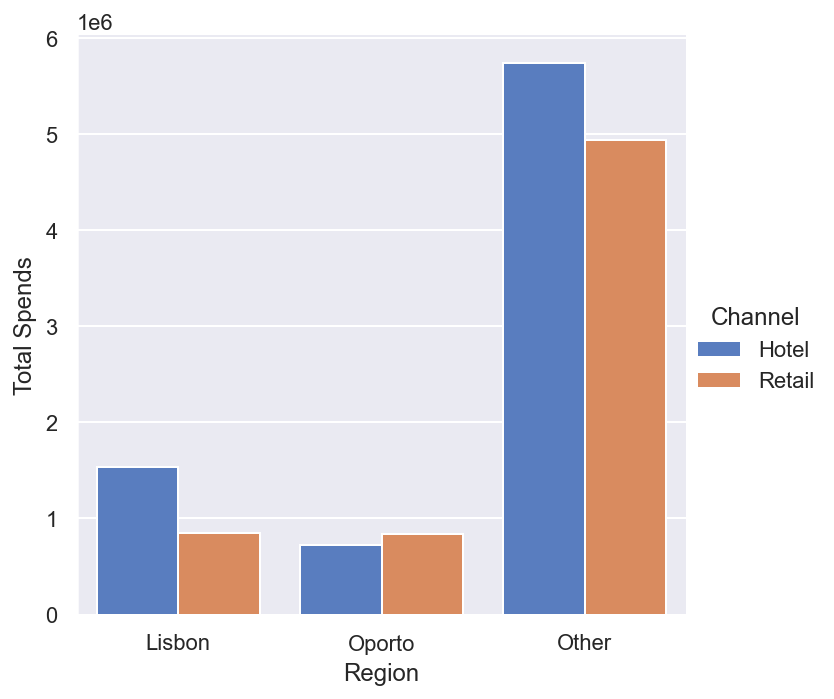

In [26]:
sns.catplot(x='Region', y='Total Spends', hue='Channel', data=wca_region_channel, kind='bar');
plt.savefig('smdm_prob1_region_channel_totalspends.jpg', bbox_inches='tight');

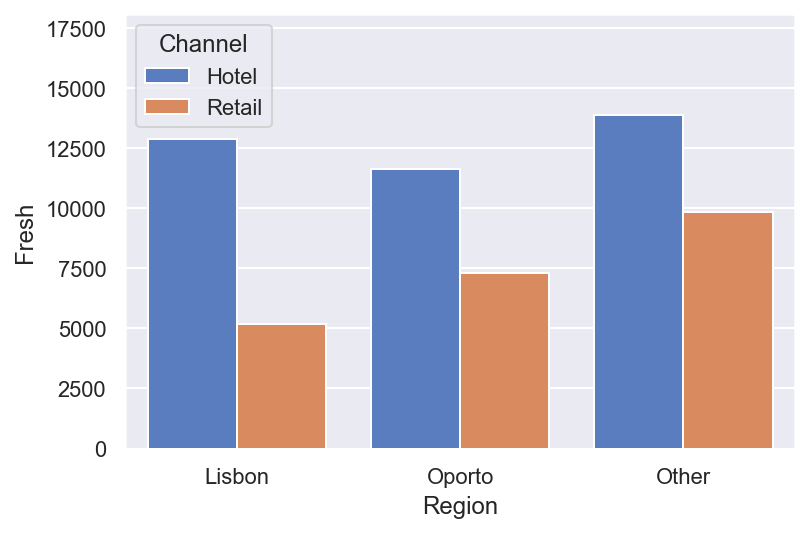

In [27]:
# prodrange = ['Fresh', 'Milk', 'Frozen', 'Grocery', 'Detergents_Paper', 'Delicatessen']

plt.ylim(0,18100)
sns.barplot(x='Region', y='Fresh', hue='Channel', data=wca, ci=False, order=['Lisbon', 'Oporto', 'Other'], 
            hue_order=['Hotel', 'Retail']);
plt.savefig('fresh_mean_spends.jpg');

#     sns.barplot(x='Region', y=i, hue='Channel', data=wca,ci=False, order=['Lisbon', 'Oporto', 'Other'], 
#            hue_order=['Hotel', 'Retail'])
#     plt.savefig('smdm_prob1_region_'+str(i)+'.jpg', bbox_inches='tight')
    

#     g.map(sns.barplot, "Channel", i, order=["Retail", "Hotel"]);
#     plt.savefig('allcat_region_channel_' + str(i) + '.jpg')

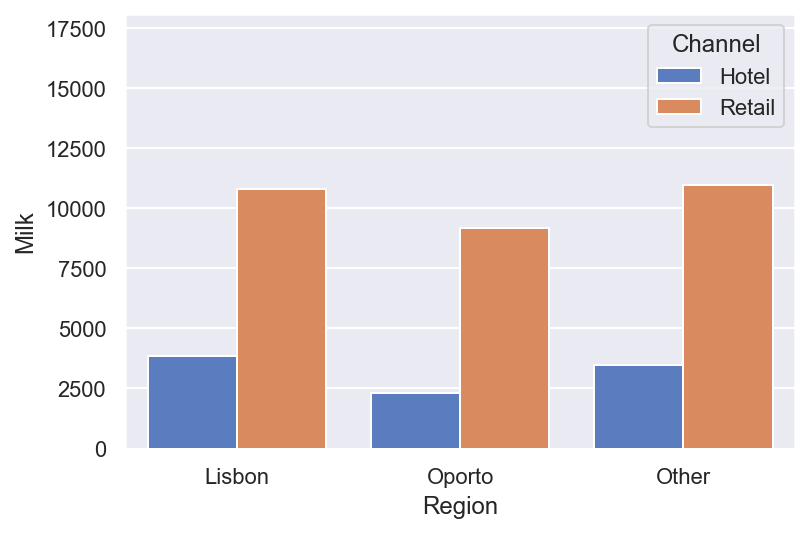

In [28]:
plt.ylim(0,18100)
sns.barplot(x='Region', y='Milk', hue='Channel', data=wca, ci=False, order=['Lisbon', 'Oporto', 'Other'], 
            hue_order=['Hotel', 'Retail']);
plt.savefig('milk_mean_spends.jpg');

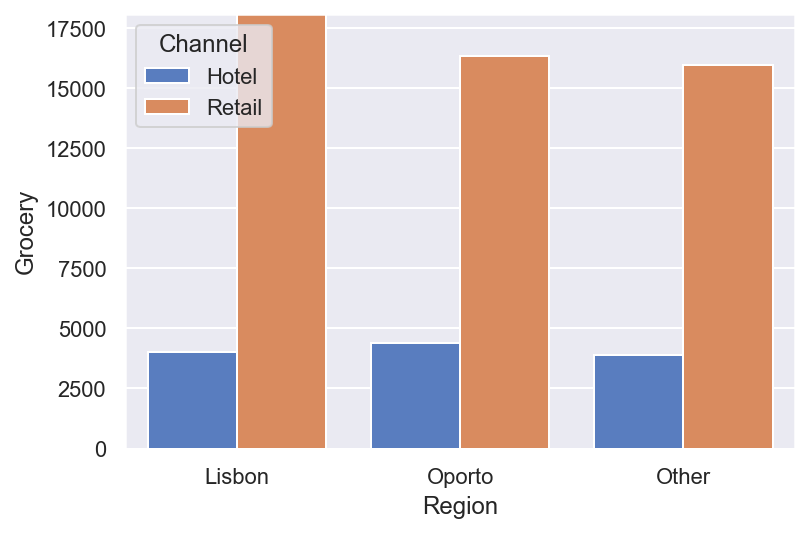

In [29]:
plt.ylim(0,18100)
sns.barplot(x='Region', y='Grocery', hue='Channel', data=wca, ci=False, order=['Lisbon', 'Oporto', 'Other'], 
            hue_order=['Hotel', 'Retail']);
plt.savefig('grocery_mean_spends.jpg');

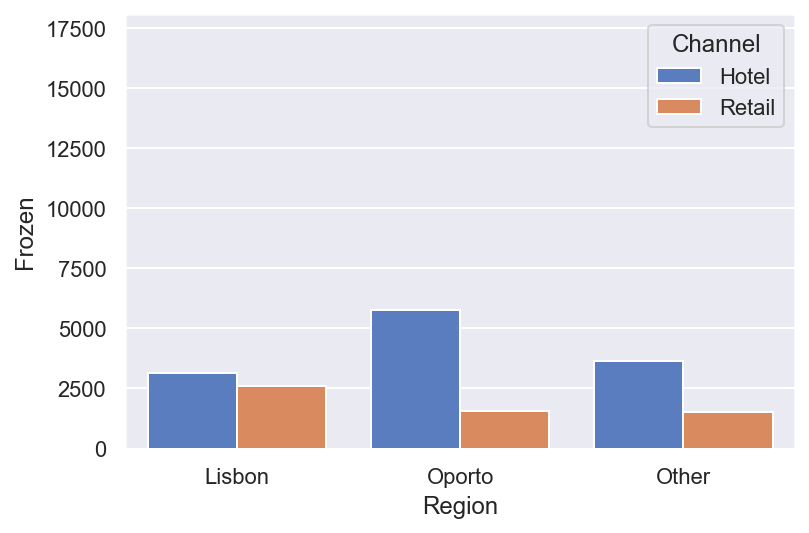

In [30]:
plt.ylim(0,18100)
sns.barplot(x='Region', y='Frozen', hue='Channel', data=wca, ci=False, order=['Lisbon', 'Oporto', 'Other'], 
            hue_order=['Hotel', 'Retail']);
plt.savefig('frozen_mean_spends.jpg');

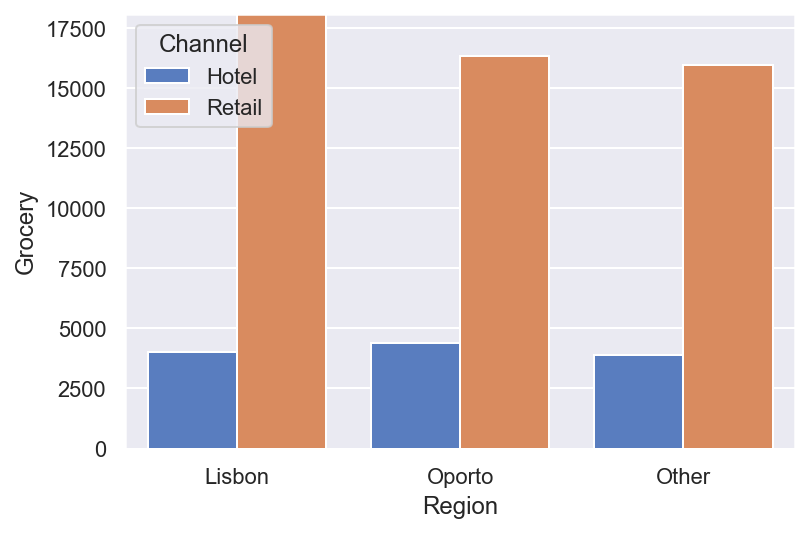

In [31]:
plt.ylim(0,18100)
sns.barplot(x='Region', y='Grocery', hue='Channel', data=wca, ci=False, order=['Lisbon', 'Oporto', 'Other'], 
            hue_order=['Hotel', 'Retail']);
plt.savefig('grocery_mean_spends.jpg');

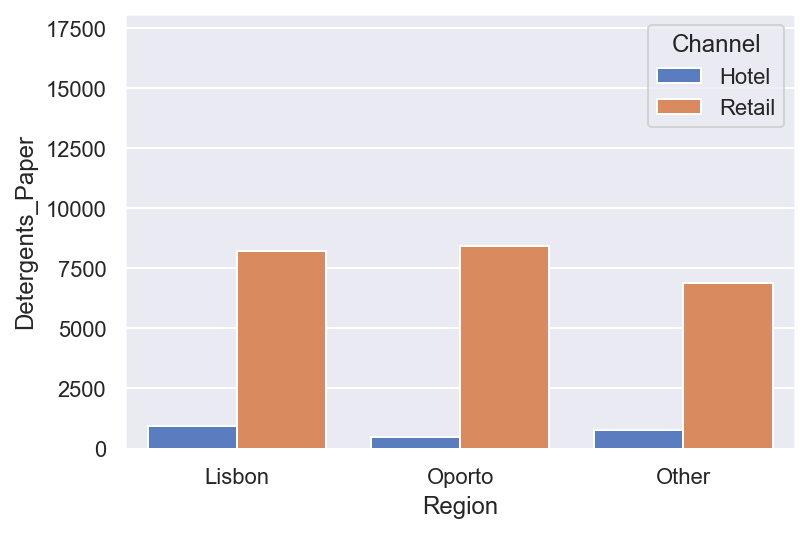

In [32]:
plt.ylim(0,18100)
sns.barplot(x='Region', y='Detergents_Paper', hue='Channel', data=wca, ci=False, order=['Lisbon', 'Oporto', 'Other'], 
            hue_order=['Hotel', 'Retail']);
plt.savefig('detpaper_mean_spends.jpg');

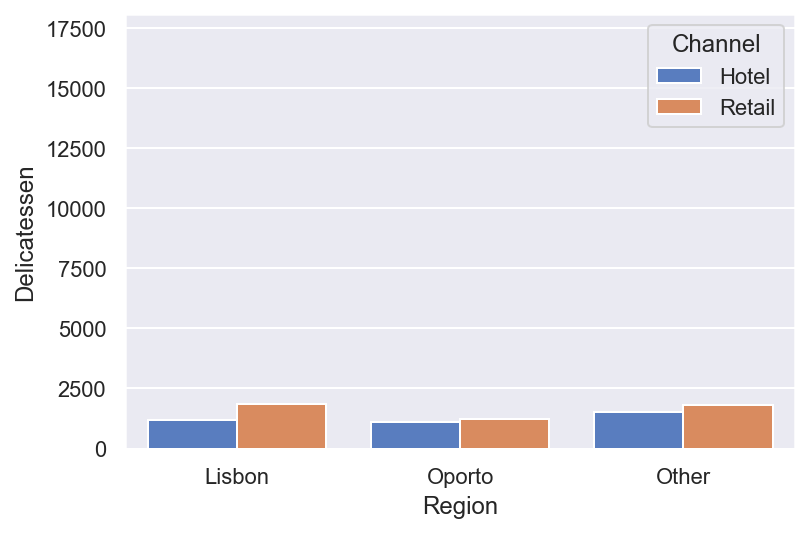

In [33]:
plt.ylim(0,18100)
sns.barplot(x='Region', y='Delicatessen', hue='Channel', data=wca, ci=False, order=['Lisbon', 'Oporto', 'Other'], 
            hue_order=['Hotel', 'Retail']);
plt.savefig('deli_mean_spends.jpg');

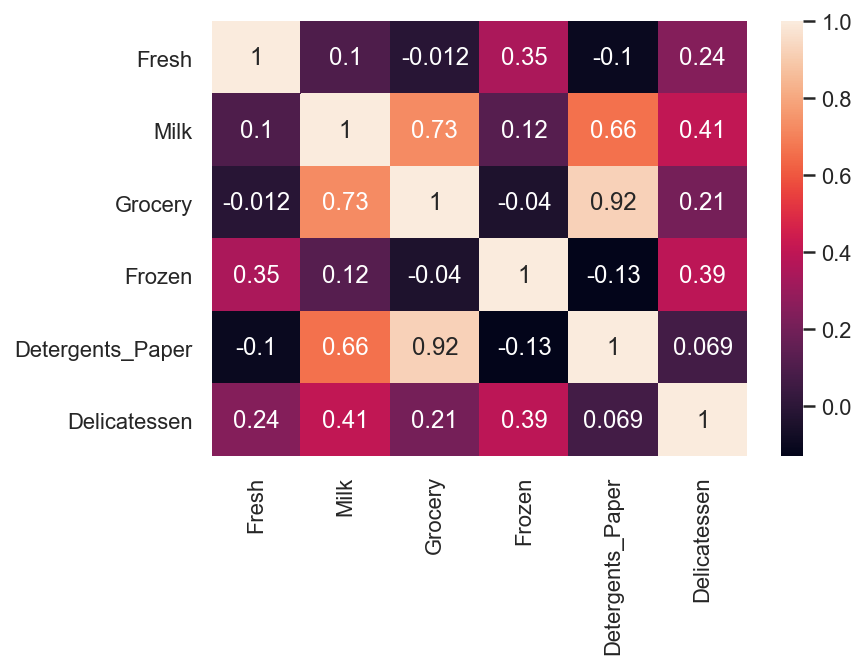

In [34]:
sns.heatmap(wca1.corr(), annot=True);
plt.savefig('corr_heatmap.jpg');

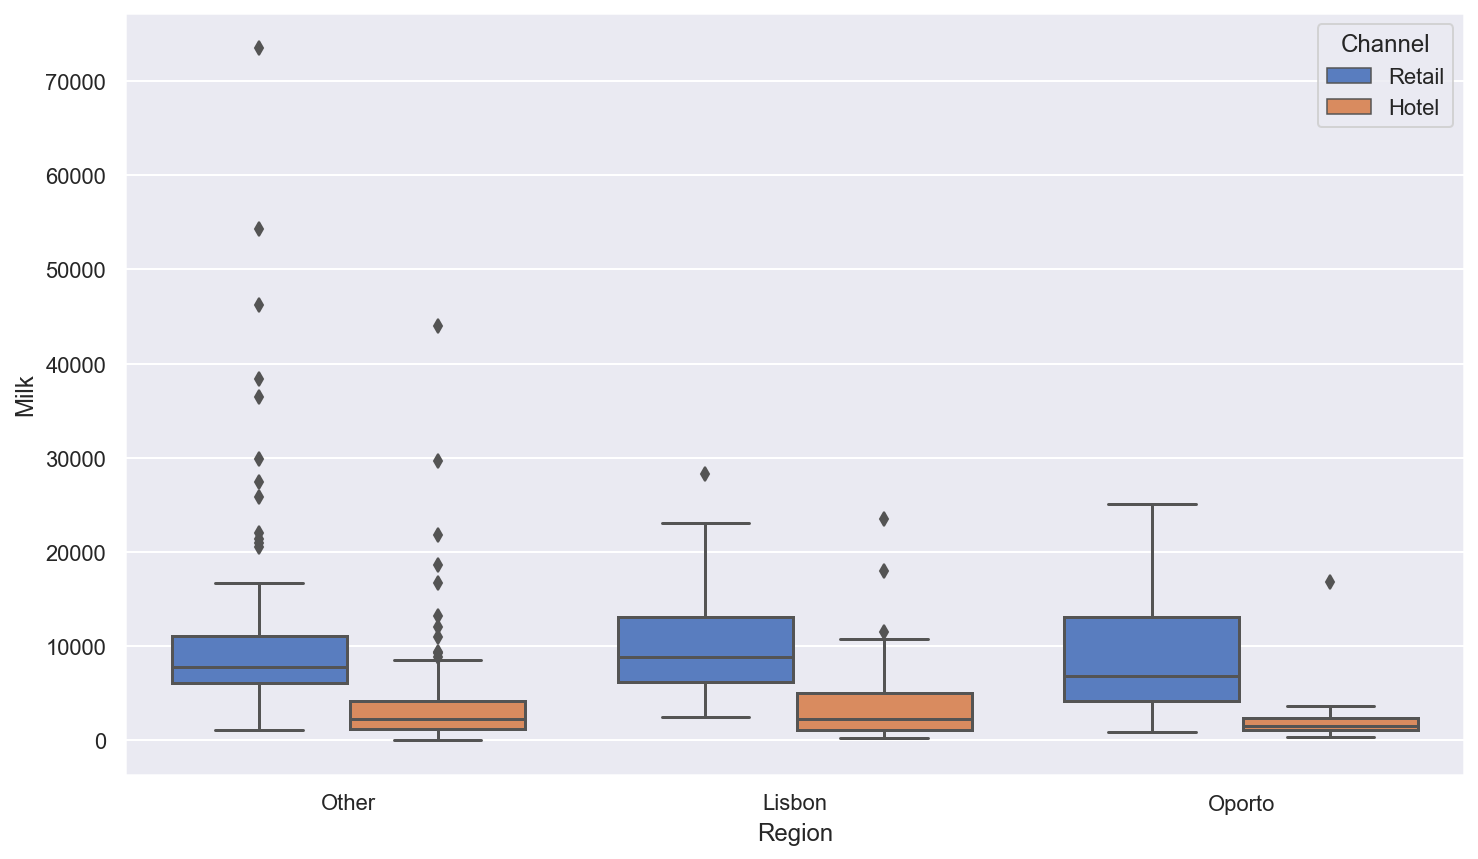

In [35]:
plt.figure(figsize=[12,7])
sns.boxplot(x='Region', y='Milk', hue='Channel', data=wca);
plt.savefig('smdm_prob1_region_milk.jpg', bbox_inches='tight');

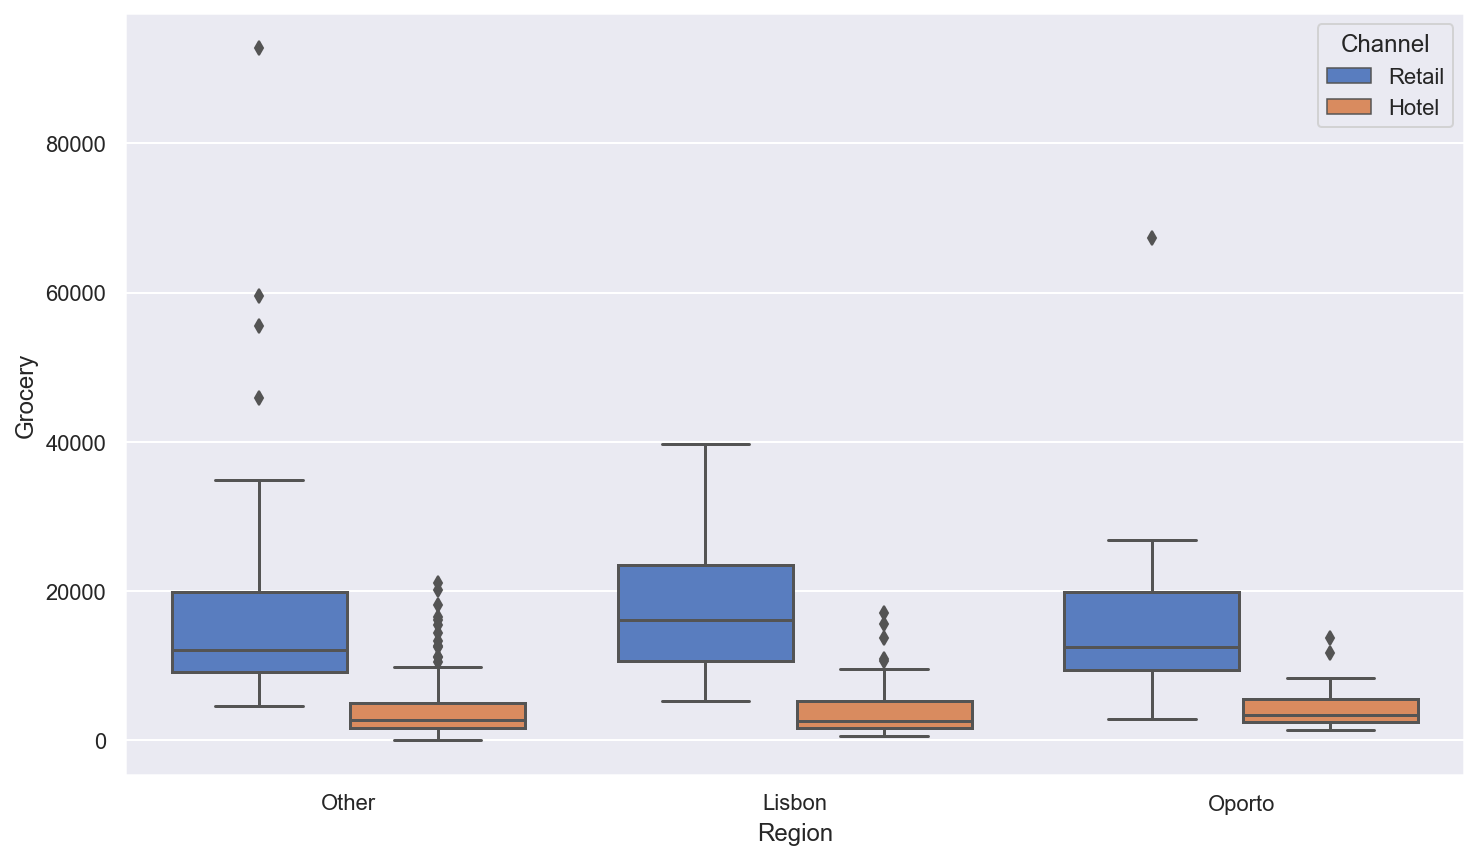

In [36]:
plt.figure(figsize=[12,7])
sns.boxplot(x='Region', y='Grocery', hue='Channel', data=wca);
plt.savefig('smdm_prob1_region_grocery.jpg', bbox_inches='tight');

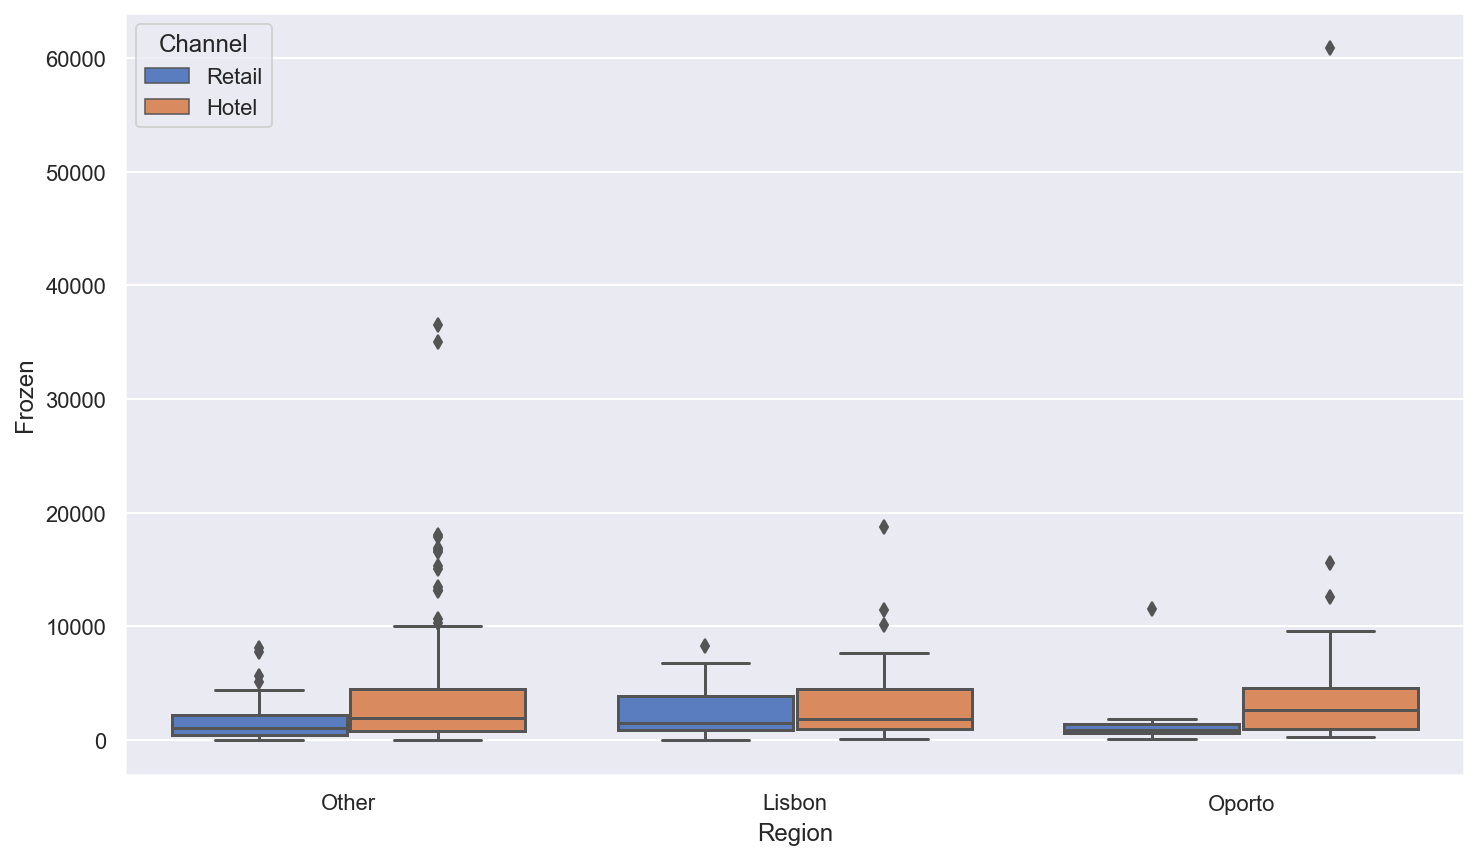

In [37]:
plt.figure(figsize=[12,7])
sns.boxplot(x='Region', y='Frozen', hue='Channel', data=wca);
plt.savefig('smdm_prob1_region_frozen.jpg', bbox_inches='tight');

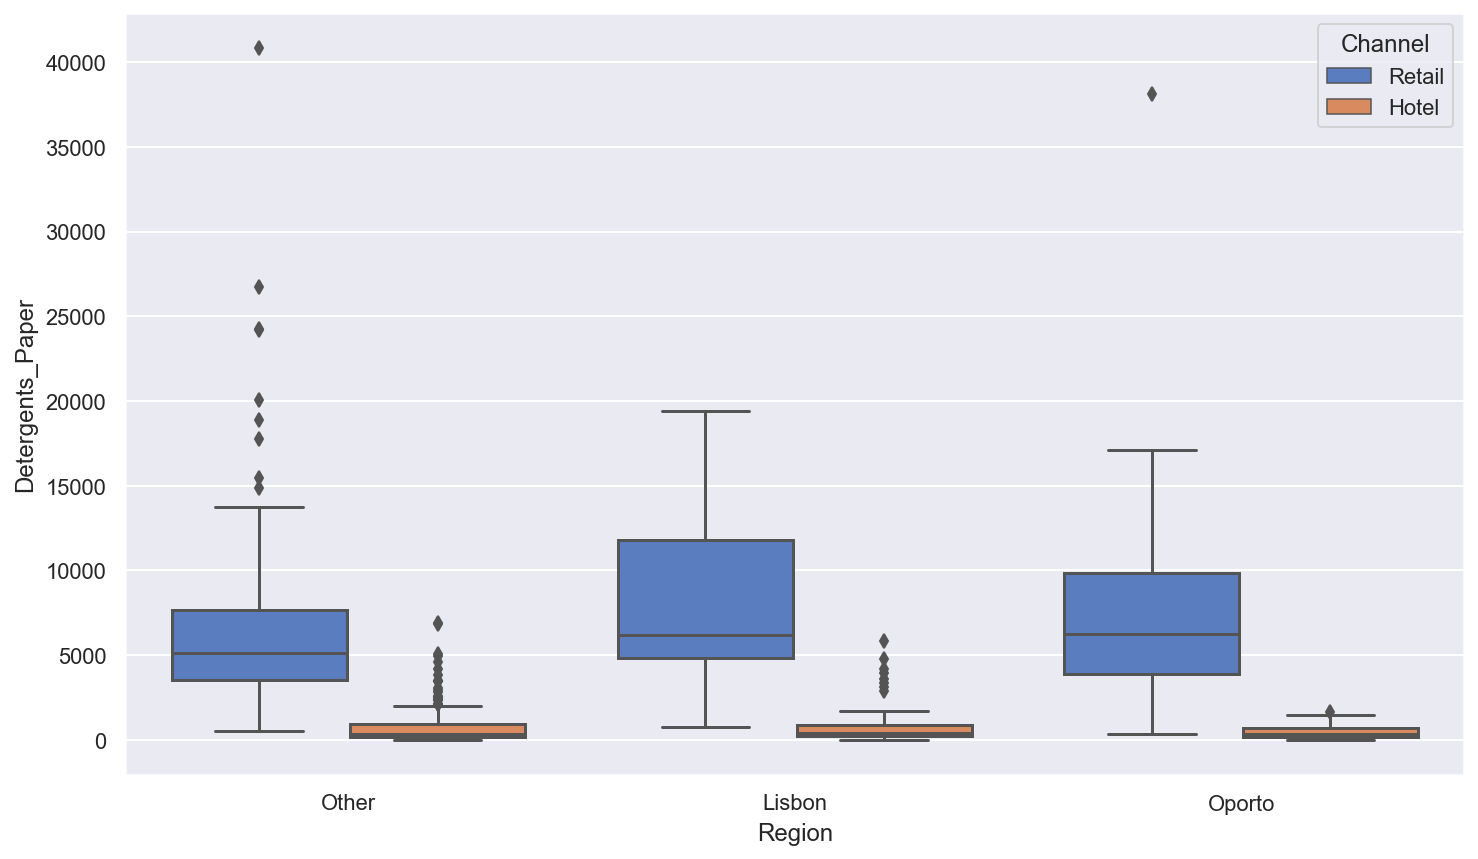

In [38]:
plt.figure(figsize=[12,7])
sns.boxplot(x='Region', y='Detergents_Paper', hue='Channel', data=wca);
plt.savefig('smdm_prob1_region_detpaper.jpg', bbox_inches='tight');

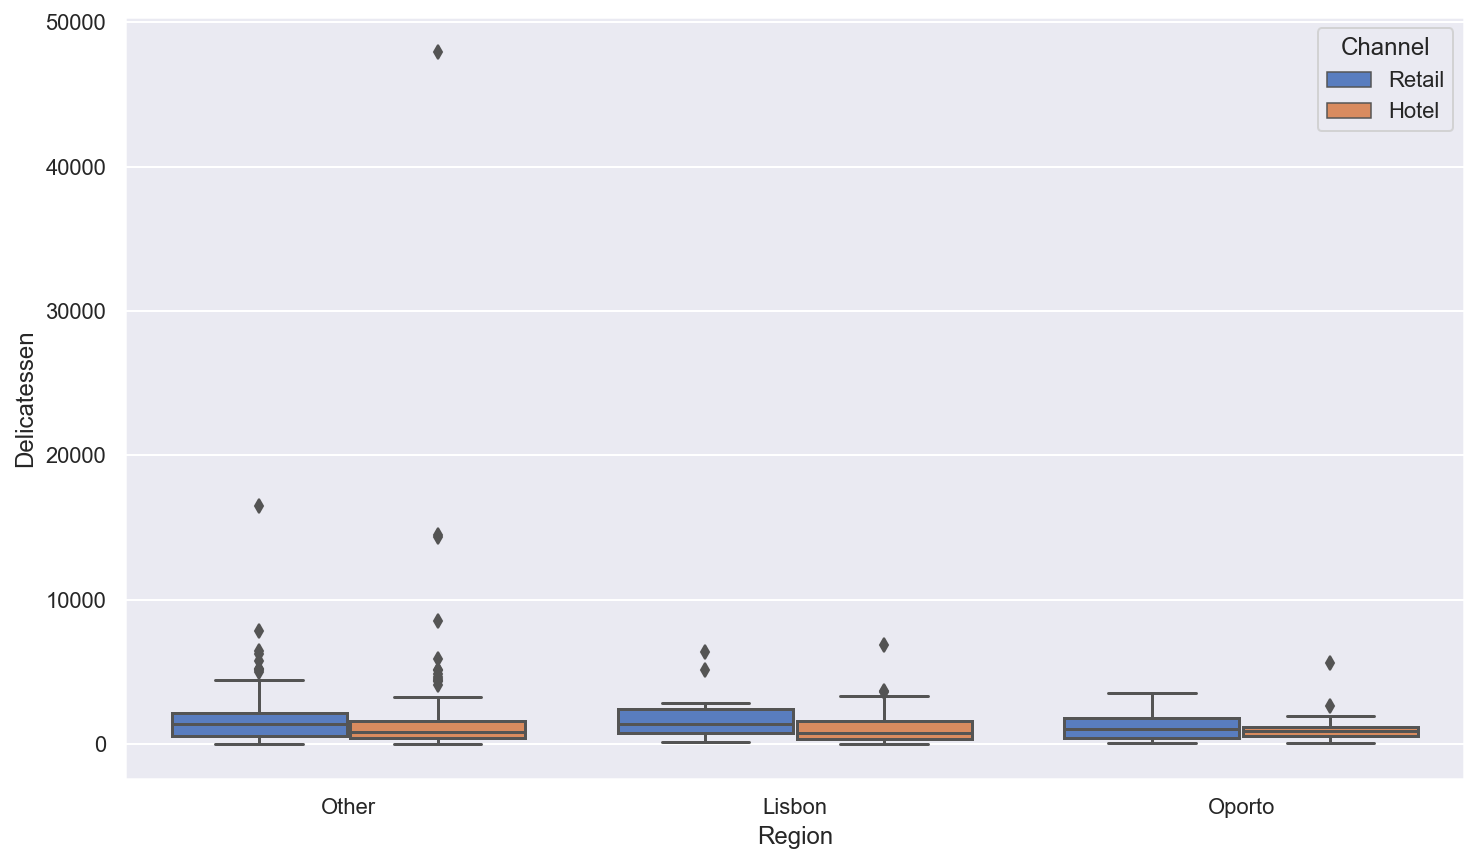

In [39]:
plt.figure(figsize=[12,7])
sns.boxplot(x='Region', y='Delicatessen', hue='Channel', data=wca);
plt.savefig('smdm_prob1_region_deli.jpg', bbox_inches='tight');

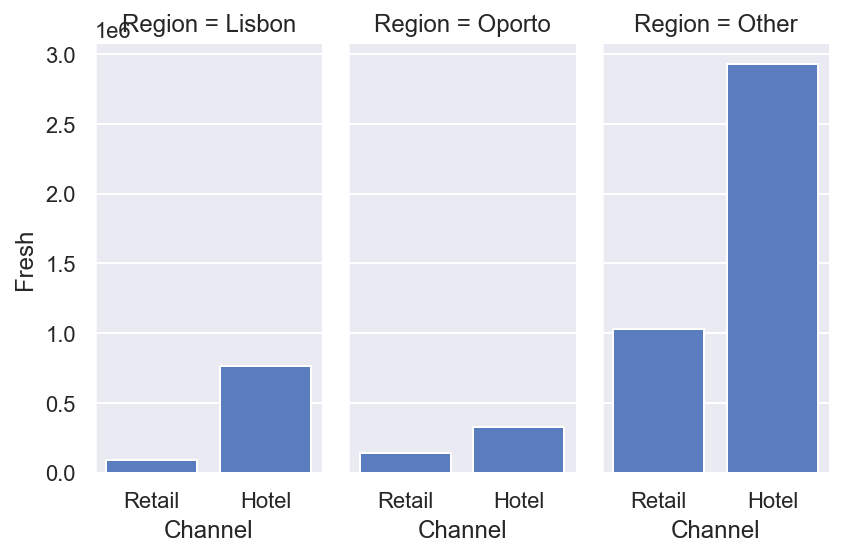

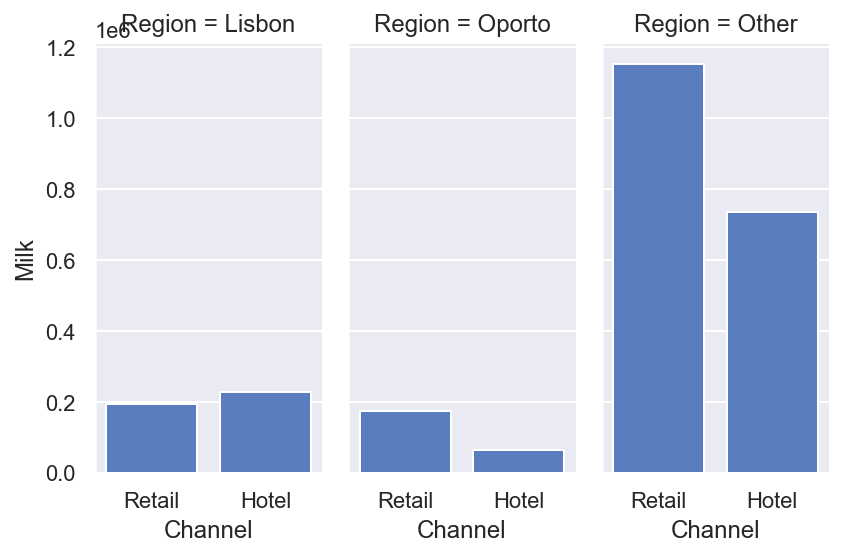

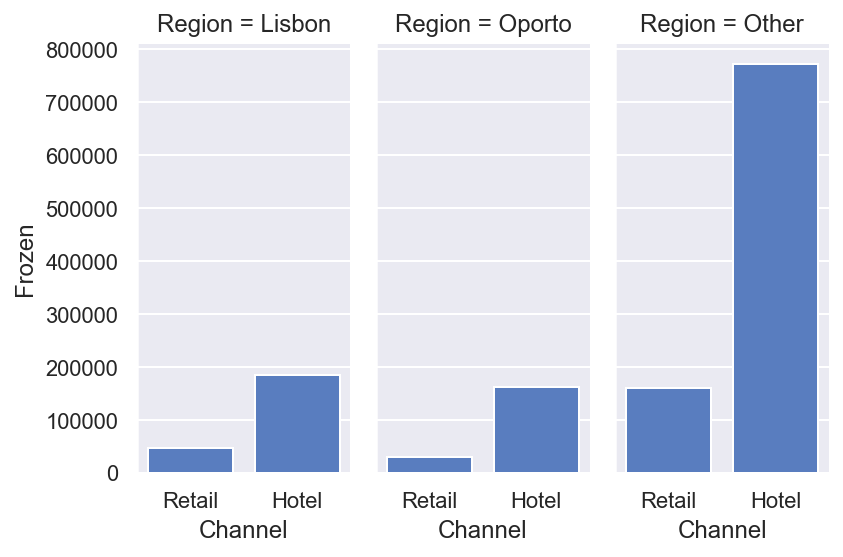

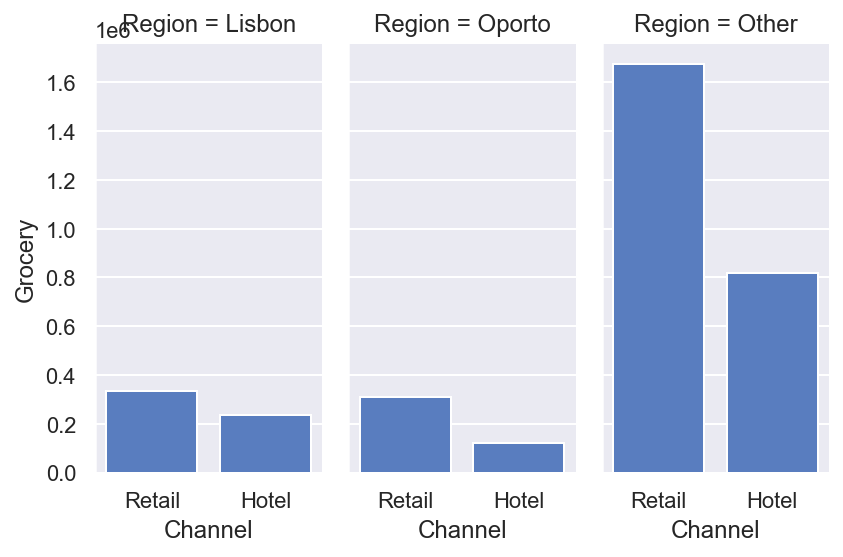

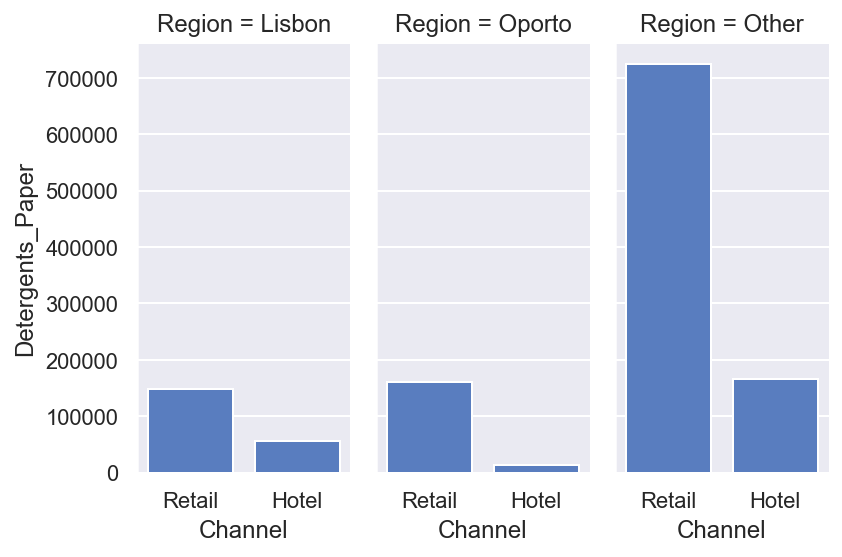

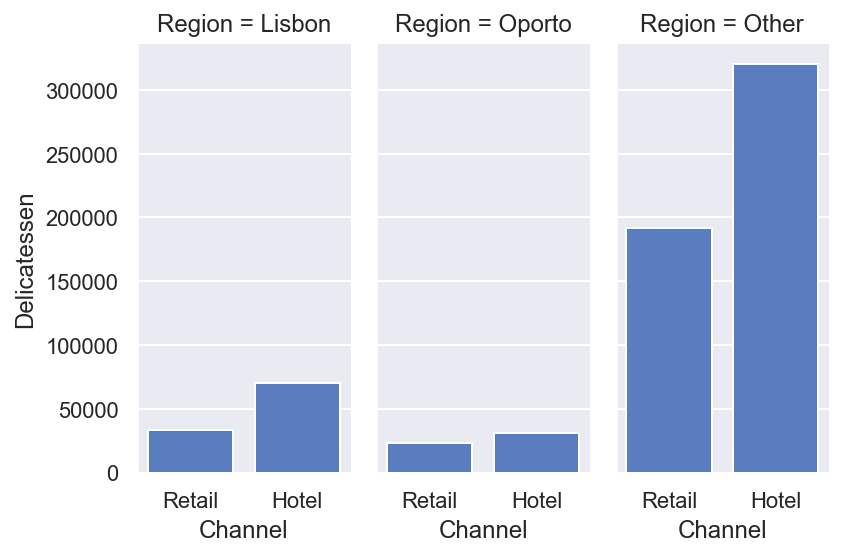

In [40]:
prodrange = ['Fresh', 'Milk', 'Frozen', 'Grocery', 'Detergents_Paper', 'Delicatessen']

for i in prodrange:
    g = sns.FacetGrid(wca_region_channel, col='Region', height=4, aspect=.5)
    g.map(sns.barplot, "Channel", i, order=["Retail", "Hotel"]);
    plt.savefig('allcat_region_channel_' + str(i) + '.jpg')
#     


### 1.7 Coefficient of Variation

In [41]:
fresh_cv = wca['Fresh'].std()/wca['Fresh'].mean()
groc_cv = wca['Grocery'].std()/wca['Grocery'].mean()
milk_cv = wca['Milk'].std()/wca['Milk'].mean()
froz_cv = wca['Frozen'].std()/wca['Frozen'].mean()
det_cv = wca['Detergents_Paper'].std()/wca['Detergents_Paper'].mean()
deli_cv = wca['Delicatessen'].std()/wca['Delicatessen'].mean()

In [42]:
print('Coefficient of Variation of FRESH =', fresh_cv)
print('Coefficient of Variation of GROCERY =', groc_cv)
print('Coefficient of Variation of MILK =', milk_cv)
print('Coefficient of Variation of FROZEN =', froz_cv)
print('Coefficient of Variation of DETERGENTS_PAPER =', det_cv)
print('Coefficient of Variation of DELICATESSEN =', deli_cv)


Coefficient of Variation of FRESH = 1.0539179237473149
Coefficient of Variation of GROCERY = 1.1951743730016824
Coefficient of Variation of MILK = 1.2732985840065414
Coefficient of Variation of FROZEN = 1.5803323836352914
Coefficient of Variation of DETERGENTS_PAPER = 1.6546471385005155
Coefficient of Variation of DELICATESSEN = 1.8494068981158382


In [43]:
cv = {'Fresh': fresh_cv,'Grocery': groc_cv, 'Milk': milk_cv,'Frozen': froz_cv,
      'Detergents_Paper': det_cv,'Delicatessen': deli_cv}
cv_df = pd.Series(cv)
print('Max CV =',cv_df.max(), cv_df.idxmax())
print('Min CV =',cv_df.min(), cv_df.idxmin())

Max CV = 1.8494068981158382 Delicatessen
Min CV = 1.0539179237473149 Fresh


### 1.8 Buyer/Spender Analysis

In [44]:
wca_copy = pd.DataFrame.copy(wca)

In [45]:
wca_copy.loc[:,'Total Spend by Buyer/Spender'] = wca_copy['Fresh'] + wca_copy['Milk'] + wca['Grocery'] + wca_copy['Frozen'] + wca_copy['Detergents_Paper'] + wca_copy['Delicatessen']
wca_copy.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend by Buyer/Spender
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [46]:
wca_copy = wca_copy.sort_values(by='Total Spend by Buyer/Spender', ascending=False)
wca_copy.head().to_csv('top_buyerspender.csv')

In [47]:
wca_copy['Total Spend by Buyer/Spender'].median()

27492.0

In [48]:
wca_copy[(wca_copy['Total Spend by Buyer/Spender'] > 27000) & 
         (wca_copy['Total Spend by Buyer/Spender'] < 28000)].to_excel('buyerspender_median.xlsx')

In [49]:
wca_copy[(wca_copy['Total Spend by Buyer/Spender'] > 27000) & (wca_copy['Total Spend by Buyer/Spender'] < 28000)]

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend by Buyer/Spender
214,215,Retail,Lisbon,2362,6551,11364,913,5957,791,27938
164,165,Retail,Other,5224,7603,8584,2540,3674,238,27863
83,84,Hotel,Other,20874,1563,1783,2320,550,772,27862
298,299,Retail,Oporto,6758,4560,9965,934,4538,1037,27792
16,17,Retail,Other,1020,8816,12121,134,4508,1080,27679
387,388,Hotel,Other,20918,1916,1573,1960,231,961,27559
32,33,Hotel,Other,21632,1318,2886,266,918,405,27425
341,342,Retail,Other,2320,5763,11238,767,5162,2158,27408
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
106,107,Retail,Other,1454,6337,10704,133,6830,1831,27289


## Problem 2 - CMSU Survey

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).



### 2.1 Load dataset and explore

In [112]:
cmsu = pd.read_csv('Survey-1.csv')
cmsu

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


cmsu.head().to_excel('cmsu_head.xlsx')
cmsu.head()

In [52]:
cmsu.tail()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50
61,62,Female,23,Senior,Economics/Finance,No,3.2,Part-Time,70.0,2,3,250,Laptop,0


In [53]:
cmsu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [54]:
cmsu.nunique()

ID                   62
Gender                2
Age                   8
Class                 3
Major                 8
Grad Intention        3
GPA                  16
Employment            3
Salary               19
Social Networking     5
Satisfaction          6
Spending             22
Computer              3
Text Messages        25
dtype: int64

In [55]:
print('Gender ----> ',cmsu['Gender'].unique())
print('Class ----> ',cmsu['Class'].unique())
print('Major ----> ',cmsu['Major'].unique())
print('Grad Intention ----> ',cmsu['Grad Intention'].unique())
print('Employment ----> ',cmsu['Employment'].unique())
print('Computer ----> ',cmsu['Computer'].unique())

Gender ---->  ['Female' 'Male']
Class ---->  ['Junior' 'Senior' 'Sophomore']
Major ---->  ['Other' 'Management' 'CIS' 'Economics/Finance' 'Undecided'
 'International Business' 'Retailing/Marketing' 'Accounting']
Grad Intention ---->  ['Yes' 'Undecided' 'No']
Employment ---->  ['Full-Time' 'Part-Time' 'Unemployed']
Computer ---->  ['Laptop' 'Tablet' 'Desktop']


In [56]:
cmsu.isna().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

### 2.2 Descriptive Stats

In [57]:
cmsu.describe(include='all').T.to_excel('cmsu_describe.xlsx')
cmsu.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62,NaN,NaN,NaN,31.5,18.0416,1,16.25,31.5,46.75,62
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62,NaN,NaN,NaN,21.129,1.43131,18,20,21,22,26
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62,NaN,NaN,NaN,3.12903,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62,NaN,NaN,NaN,48.5484,12.0809,25,40,50,55,80
Social Networking,62,NaN,NaN,NaN,1.51613,0.844305,0,1,1,2,4


In [58]:
cmsu[['Grad Intention', 'ID']].groupby('Grad Intention').count()

,ID
Grad Intention,
No,12
Undecided,22
Yes,28


In [59]:
cmsu[['Employment', 'ID']].groupby('Employment').count()

,ID
Employment,
Full-Time,10
Part-Time,43
Unemployed,9


,ID
Class,
Junior,25
Senior,31
Sophomore,6


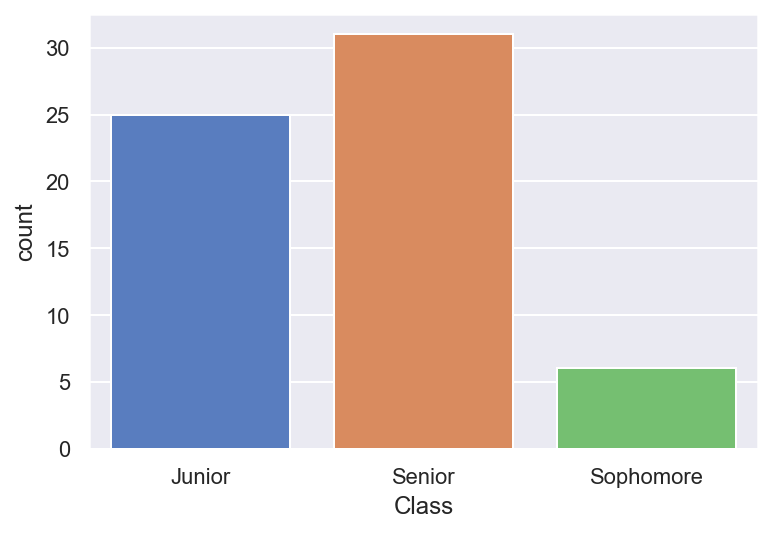

In [60]:
cmsu[['Class', 'ID']].groupby(['Class']).count()
sns.countplot(x='Class', data=cmsu)

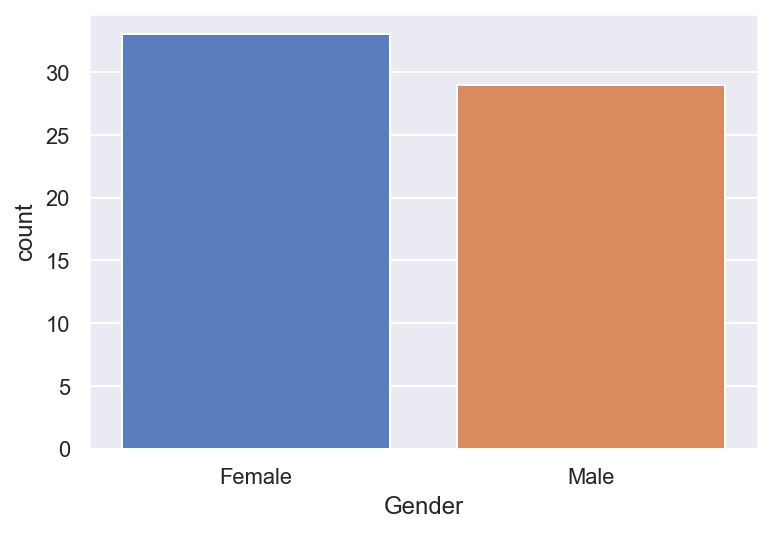

In [61]:
sns.countplot(x='Gender', data=cmsu);
plt.savefig('cmsu_gender_count.jpg');

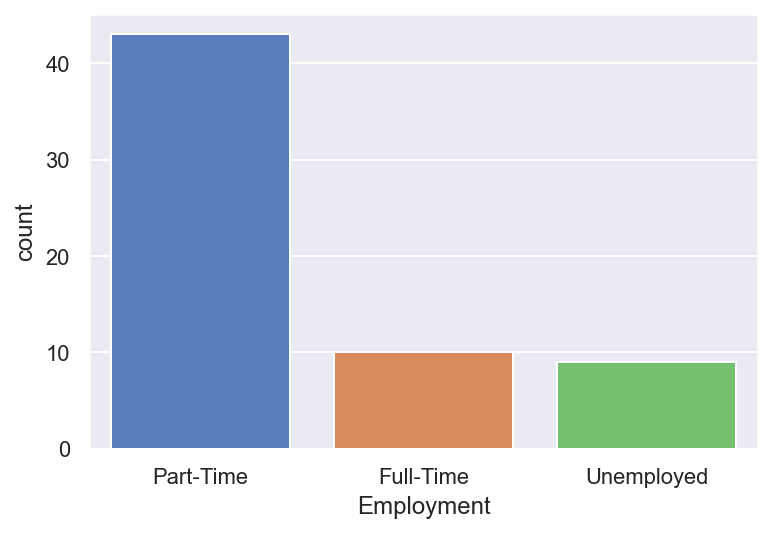

In [62]:
sns.countplot(x='Employment', data=cmsu, order=['Part-Time', 'Full-Time', 'Unemployed']);
plt.savefig('cmsu_employ_count.jpg');

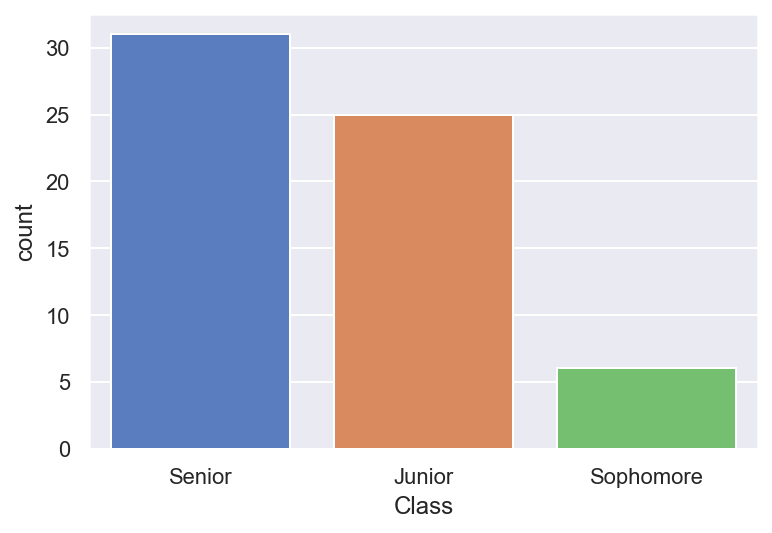

In [63]:
sns.countplot(x='Class', data=cmsu, order=['Senior', 'Junior', 'Sophomore']);
plt.savefig('cmsu_class_count.jpg');

,ID
Major,
Accounting,7
CIS,4
Economics/Finance,11
International Business,6
Management,10
Other,7
Retailing/Marketing,14
Undecided,3


<Figure size 576x576 with 0 Axes>

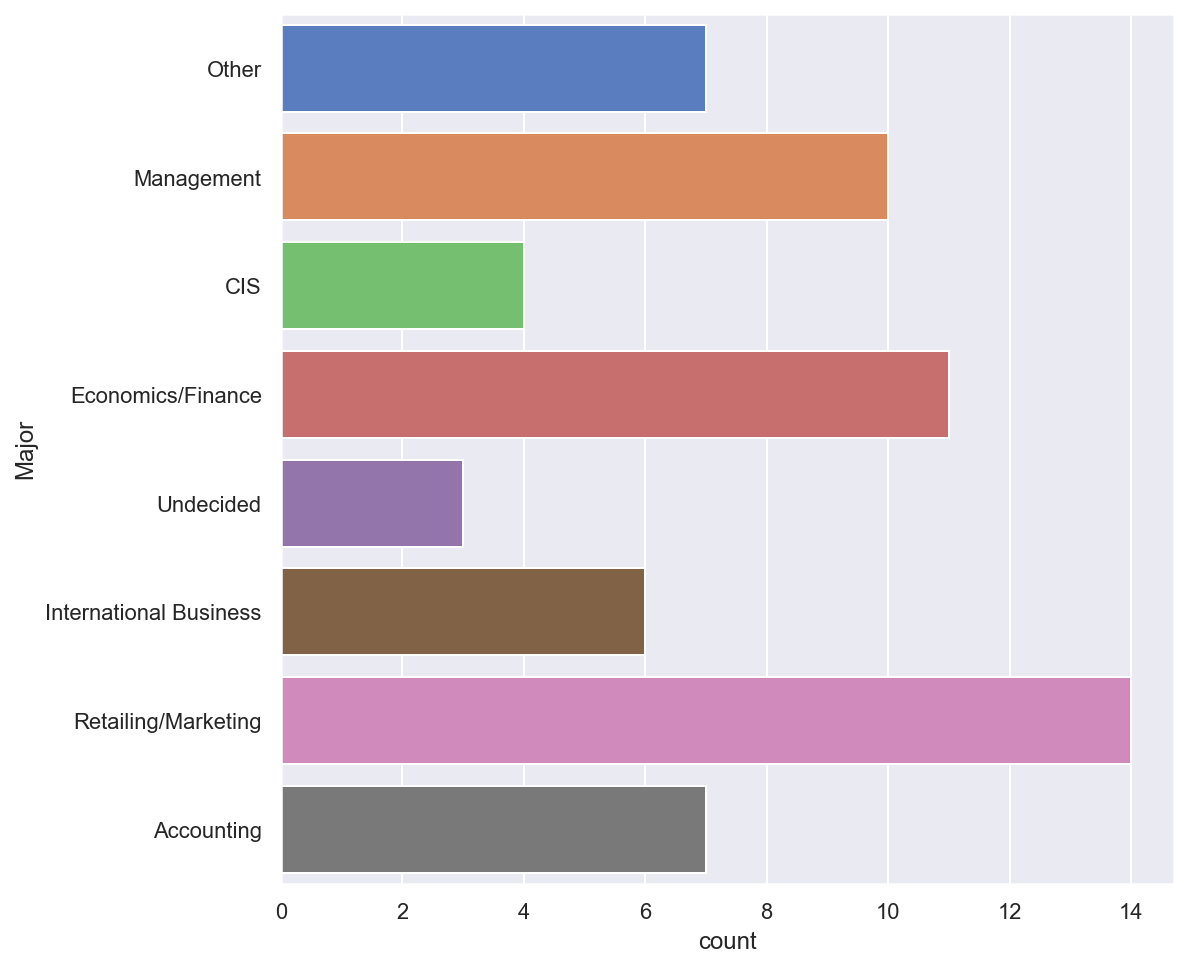

In [64]:
cmsu[['Major', 'ID']].groupby(['Major']).count()
plt.figure(figsize=[8,8])
sns.countplot(y='Major', data=cmsu)
plt.savefig('cmsu_major_count.jpg')

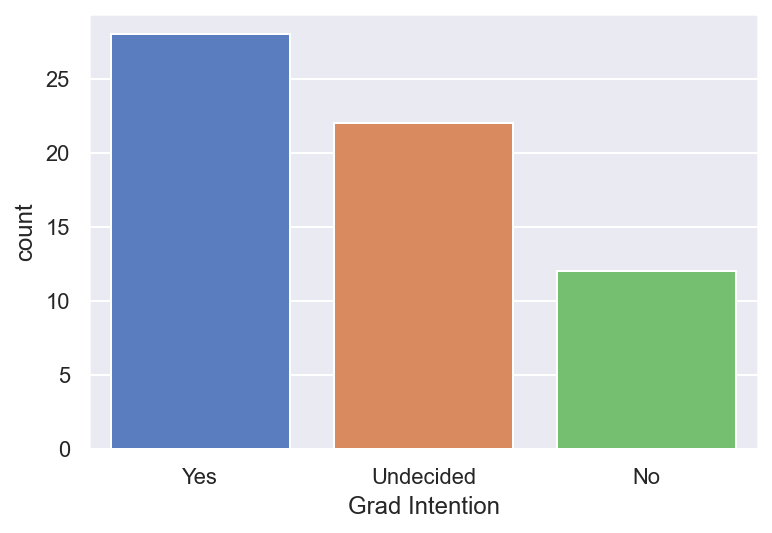

In [65]:
sns.countplot(x='Grad Intention', data=cmsu)
plt.savefig('cmsu_gradintent_count.jpg');

In [66]:
cmsu[['Class', 'Major','ID']].groupby(['Class', 'Major']).count()

ID
Class     Major                     
Junior    Accounting               4
          CIS                      3
          Economics/Finance        5
          International Business   1
          Management               3
          Other                    4
          Retailing/Marketing      5
Senior    Accounting               1
          Economics/Finance        6
          International Business   5
          Management               7
          Other                    3
          Retailing/Marketing      7
          Undecided                2
Sophomore Accounting               2
          CIS                      1
          Retailing/Marketing      2
          Undecided                1

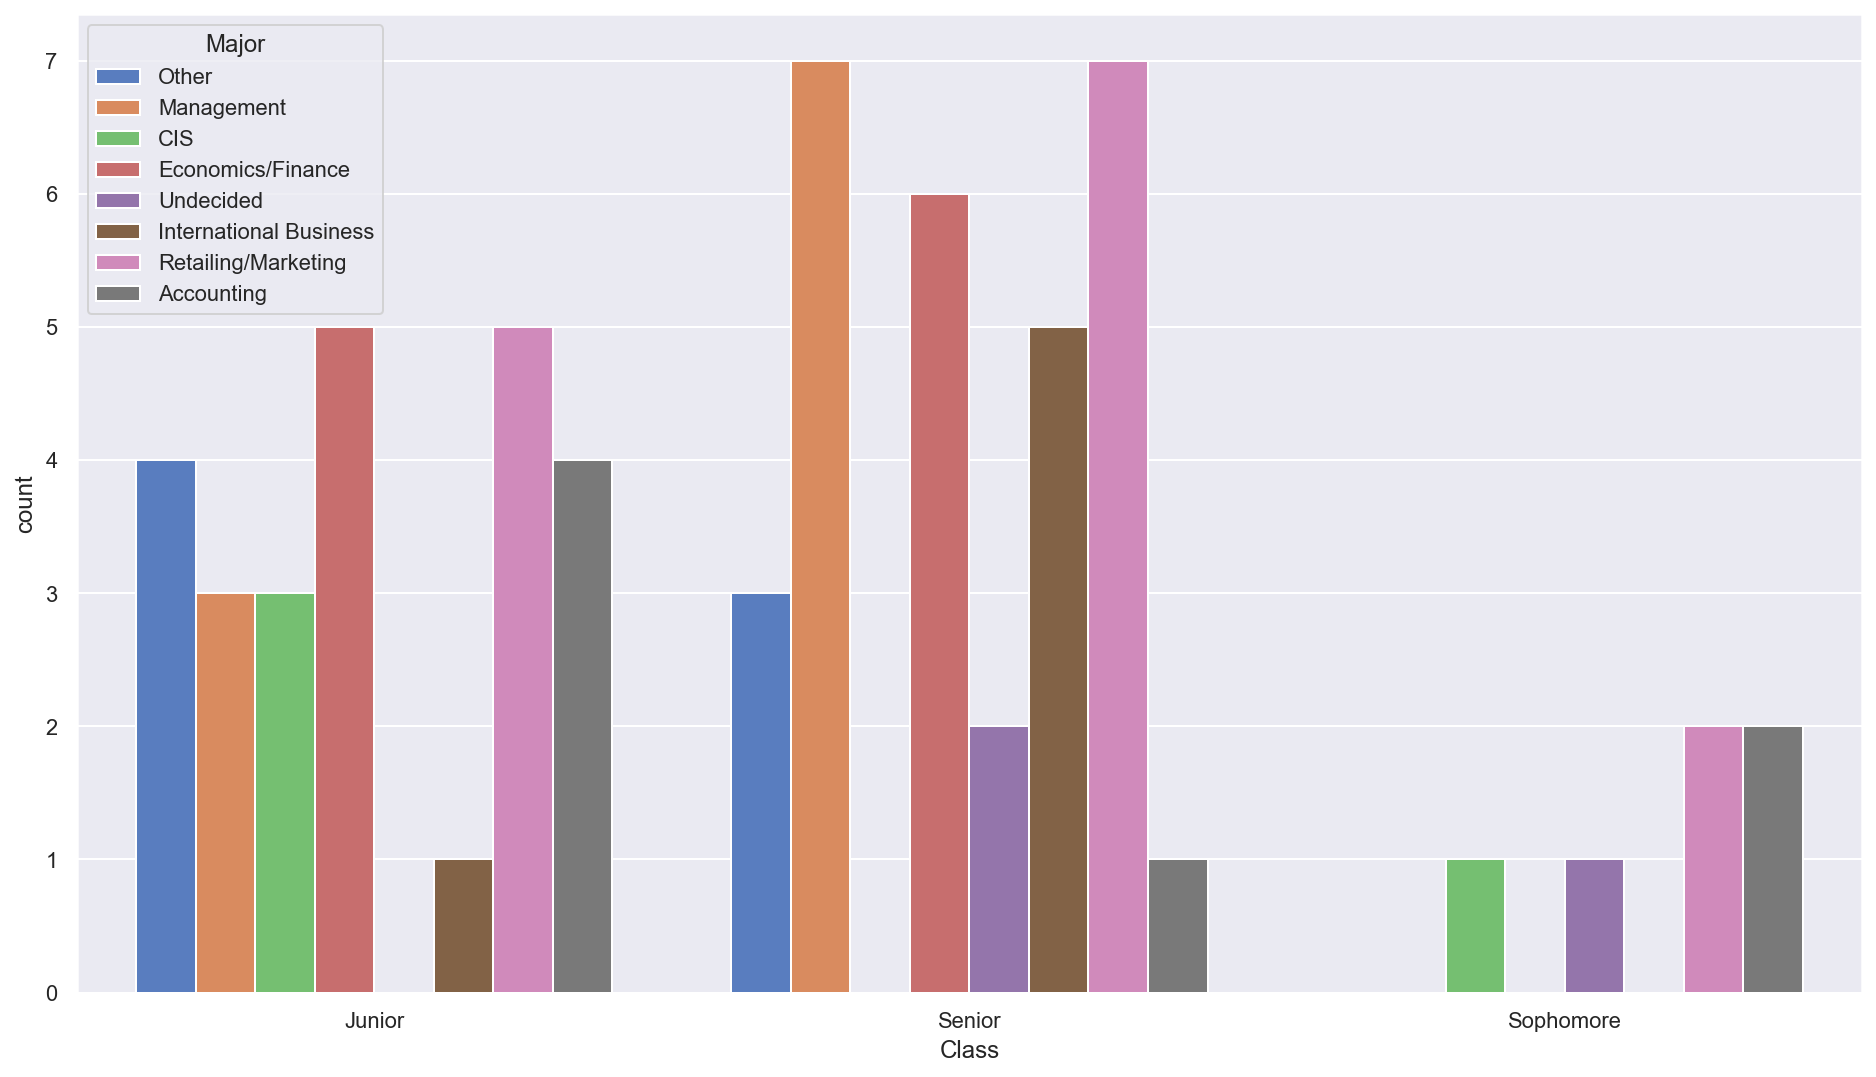

In [67]:
plt.figure(figsize=[16,9])
sns.countplot(x='Class', hue='Major', data=cmsu);

### 2.3 Basic Understanding of Data

In [68]:
print('Basic Understanding of Data -')
print(''.ljust(10) + '1. Total number of Undergrads surveyed = 62')
print(''.ljust(10) + '2. Total number of Questions (Variables) asked per candidate = 14')
print(''.ljust(15) + 'a. Categorical Variables = 6 (Gender, Class, Major, Grad Intention, Employment, Computer)')
print(''.ljust(15) + 'b. Continuous Variables = 8')
print(''.ljust(20) + '- Data Type Integer = 6 (ID, Age, Social Networking, Satisfaction, Spending, Text Messages)')
print(''.ljust(20) + '- Data Type Float = 2 (GPA, Salary)')

Basic Understanding of Data -
          1. Total number of Undergrads surveyed = 62
          2. Total number of Questions (Variables) asked per candidate = 14
               a. Categorical Variables = 6 (Gender, Class, Major, Grad Intention, Employment, Computer)
               b. Continuous Variables = 8
                    - Data Type Integer = 6 (ID, Age, Social Networking, Satisfaction, Spending, Text Messages)
                    - Data Type Float = 2 (GPA, Salary)


### 2.4 More In-depth Understanding of Data

In [69]:
print('More In-depth Understanding of Data -')
print(''.ljust(10) + '1. Gender wise Distribution -')
print(''.ljust(15) + 'a. Female - 33')
print(''.ljust(15) + 'b. Male - 29')
print(''.ljust(10) + '2. Mean Age - 21')
print(''.ljust(10) + '3. Maximum are good in studies and have good scores -')
print(''.ljust(15) + '* Mean GPA - 3.13')
print(''.ljust(10) + '4. Maximum are Part-Time employed - ')
print(''.ljust(15) + 'a. Part-Time - 43')
print(''.ljust(15) + 'b. Full-Time - 10')
print(''.ljust(15) + 'c. Unemployed - 9')
print(''.ljust(10) + '5. Class wise Distribution -')
print(''.ljust(15) + 'a. Senior - 31')
print(''.ljust(15) + 'b. Junior - 25')
print(''.ljust(15) + 'c. Sophomore - 6')
print(''.ljust(10) + '6. Study Major wise Distribution (Top 3) -')
print(''.ljust(15) + 'a. Retailing/Marketing - 14')
print(''.ljust(15) + 'b. Economics.Finance - 11')
print(''.ljust(15) + 'c. Management - 10')
print(''.ljust(10) + '7. Majority would like to pursue Graduation -')
print(''.ljust(13) + '(Undecided participants should be targetted by CMSU Marketing to convince them to pursue Grad)')
print(''.ljust(15) + 'a. Pursue Grad - 28')
print(''.ljust(15) + 'b. Undecided - 22')
print(''.ljust(15) + 'c. Do not want to pursue Grad - 12')
print(''.ljust(10) + '8. Maximum have very low Social Networking skills/presence')
print(''.ljust(13) + '(CMSU cannot target communication over social media - Needs to be over mails or messages)')
print(''.ljust(15) + '* Mean Social Networking rating - 1')
print(''.ljust(10) + '9. Very high Satisfaction rating amongst the Undergrad Participants')
print(''.ljust(15) + '* Mean Satisfaction rating - 4')

More In-depth Understanding of Data -
          1. Gender wise Distribution -
               a. Female - 33
               b. Male - 29
          2. Mean Age - 21
          3. Maximum are good in studies and have good scores -
               * Mean GPA - 3.13
          4. Maximum are Part-Time employed - 
               a. Part-Time - 43
               b. Full-Time - 10
               c. Unemployed - 9
          5. Class wise Distribution -
               a. Senior - 31
               b. Junior - 25
               c. Sophomore - 6
          6. Study Major wise Distribution (Top 3) -
               a. Retailing/Marketing - 14
               b. Economics.Finance - 11
               c. Management - 10
          7. Majority would like to pursue Graduation -
             (Undecided participants should be targetted by CMSU Marketing to convince them to pursue Grad)
               a. Pursue Grad - 28
               b. Undecided - 22
               c. Do not want to pursue Grad - 12
          

### Question no. 2.1.1

In [70]:
gender_major = pd.crosstab(cmsu['Gender'], cmsu['Major'], margins=True, margins_name='Total')
gender_major.to_excel('gender_major.xlsx')
gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


### Question no. 2.1.2

In [71]:
gender_gradintent = pd.crosstab(cmsu['Gender'], cmsu['Grad Intention'], margins=True, margins_name='Total')
gender_gradintent.to_excel('gender_gradintent.xlsx')
gender_gradintent

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


### Question no. 2.1.3

In [72]:
gender_employ = pd.crosstab(cmsu['Gender'], cmsu['Employment'], margins=True, margins_name='Total')
gender_employ.to_excel('gender_employ.xlsx')
gender_employ

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


### Question no. 2.1.4

In [73]:
gender_comp = pd.crosstab(cmsu['Gender'], cmsu['Computer'], margins=True, margins_name='Total')
gender_comp.to_excel('gender_comp.xlsx')
gender_comp

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


### Question no. 2.6

In [74]:
gender_gradintent1 = pd.crosstab(cmsu['Gender'], cmsu['Grad Intention'])
gender_gradintent1.drop('Undecided', axis=1, inplace=True)
gender_gradintent1.loc[:,'Total'] = gender_gradintent1.sum(axis=1)
gender_gradintent1.loc['Total',:] = gender_gradintent1.sum()
gender_gradintent1.to_excel('gender_grad_1.xlsx')
gender_gradintent1

Grad Intention,No,Yes,Total
Gender,,,
Female,9.0,11.0,20.0
Male,3.0,17.0,20.0
Total,12.0,28.0,40.0


### Question 2.7
###  Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data



### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?



In [75]:
import scipy.stats as stats

In [76]:
mu_gpa = cmsu['GPA'].mean()
si_gpa = cmsu['GPA'].std()
mu_gpa
si_gpa


3.129032258064516

0.3773883926969118

In [77]:
z1 = (3 - mu_gpa)/si_gpa
stats.norm.cdf(z1)
z1

0.3662099174094998

-0.3419083908289262

In [78]:
stats.norm.cdf(3, mu_gpa, si_gpa)

0.3662099174094998

### 2.6.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [107]:
cmsu_fem = cmsu[cmsu['Gender']=='Female']
cmsu_mal = cmsu[cmsu['Gender']=='Male']
cmsu_fem


,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
9,10,Female,21,Senior,Economics/Finance,Undecided,3.3,Part-Time,37.5,1,4,200,Laptop,100
10,11,Female,23,Senior,Economics/Finance,Yes,2.8,Full-Time,50.0,2,5,400,Laptop,200
16,17,Female,19,Junior,CIS,Undecided,3.7,Part-Time,55.0,1,4,450,Laptop,150
19,20,Female,20,Junior,Management,Undecided,3.2,Unemployed,60.0,2,6,300,Laptop,350
20,21,Female,22,Junior,Retailing/Marketing,Undecided,3.2,Part-Time,55.0,1,3,690,Laptop,50


In [108]:
cmsu_mal

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
11,12,Male,21,Senior,Undecided,No,3.5,Full-Time,37.0,2,3,500,Laptop,100
12,13,Male,22,Senior,International Business,Undecided,3.4,Part-Time,40.0,2,3,400,Desktop,45
13,14,Male,22,Senior,International Business,Undecided,3.1,Part-Time,40.0,1,3,400,Laptop,150
14,15,Male,21,Senior,Management,Yes,3.2,Part-Time,54.0,3,4,600,Laptop,400
15,16,Male,24,Senior,Management,Undecided,3.4,Part-Time,45.0,4,4,500,Laptop,175
17,18,Male,21,Junior,Economics/Finance,Undecided,3.1,Part-Time,55.0,2,3,600,Laptop,300


In [103]:
pd.crosstab(cmsu['Gender'], cmsu['Salary']<50)

Salary,False,True
Gender,,
Female,18,15
Male,14,15


In [104]:
pd.crosstab(cmsu['Gender'], cmsu['Salary']>=50)

Salary,False,True
Gender,,
Female,15,18
Male,15,14


In [105]:
pd.crosstab(cmsu['Gender'], cmsu['GPA']<3)

GPA,False,True
Gender,,
Female,25,8
Male,20,9


In [106]:
pd.crosstab(cmsu['Gender'], cmsu['GPA']>=3)

GPA,False,True
Gender,,
Female,8,25
Male,9,20


### 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions

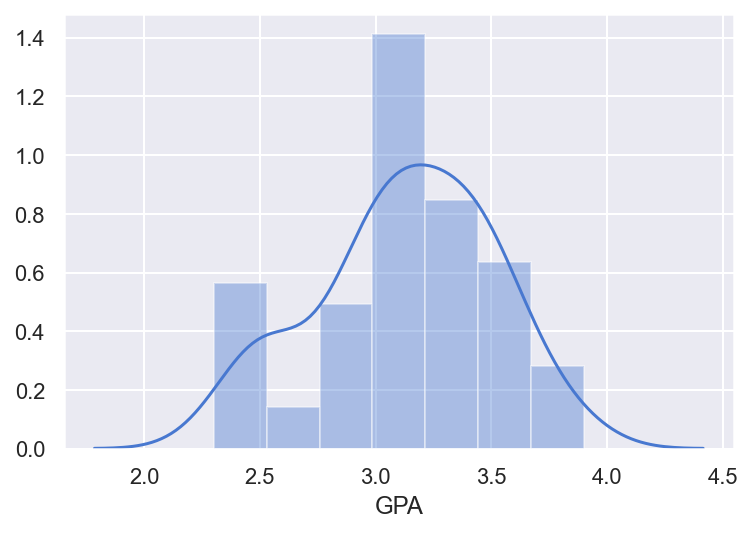

In [83]:
sns.distplot(cmsu['GPA']);
plt.savefig('gpa_kde.jpg');

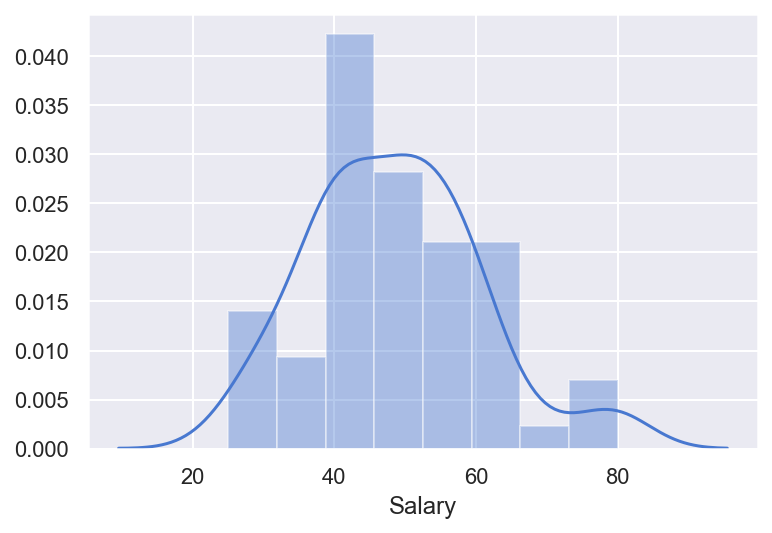

In [84]:
sns.distplot(cmsu['Salary']);
plt.savefig('sal_kde.jpg');

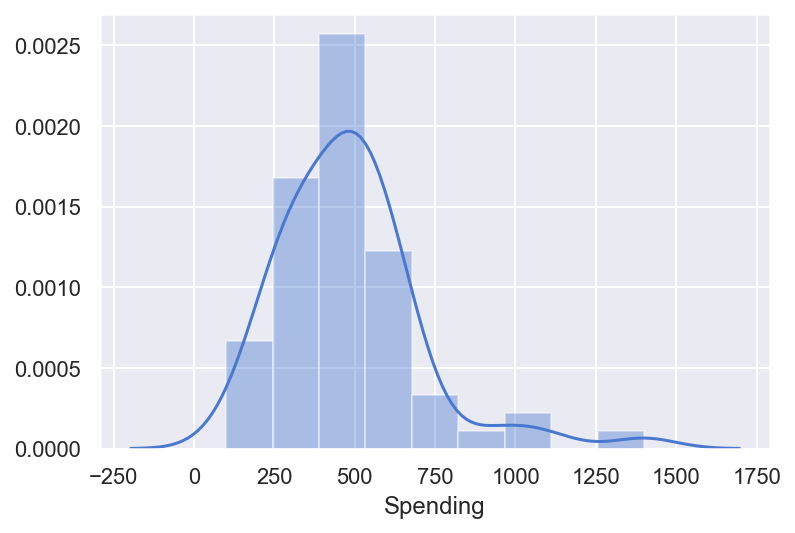

In [85]:
sns.distplot(cmsu['Spending']);
plt.savefig('spend_kde.jpg');

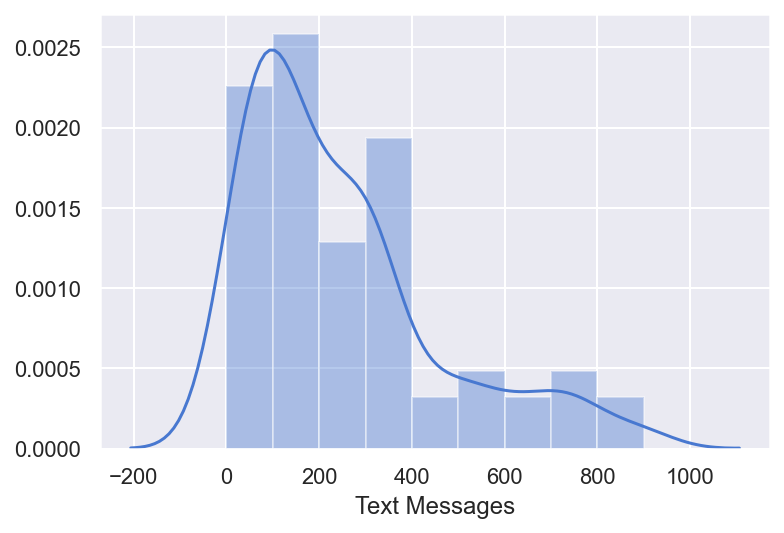

In [86]:
sns.distplot(cmsu['Text Messages']);
plt.savefig('txt_kde.jpg');

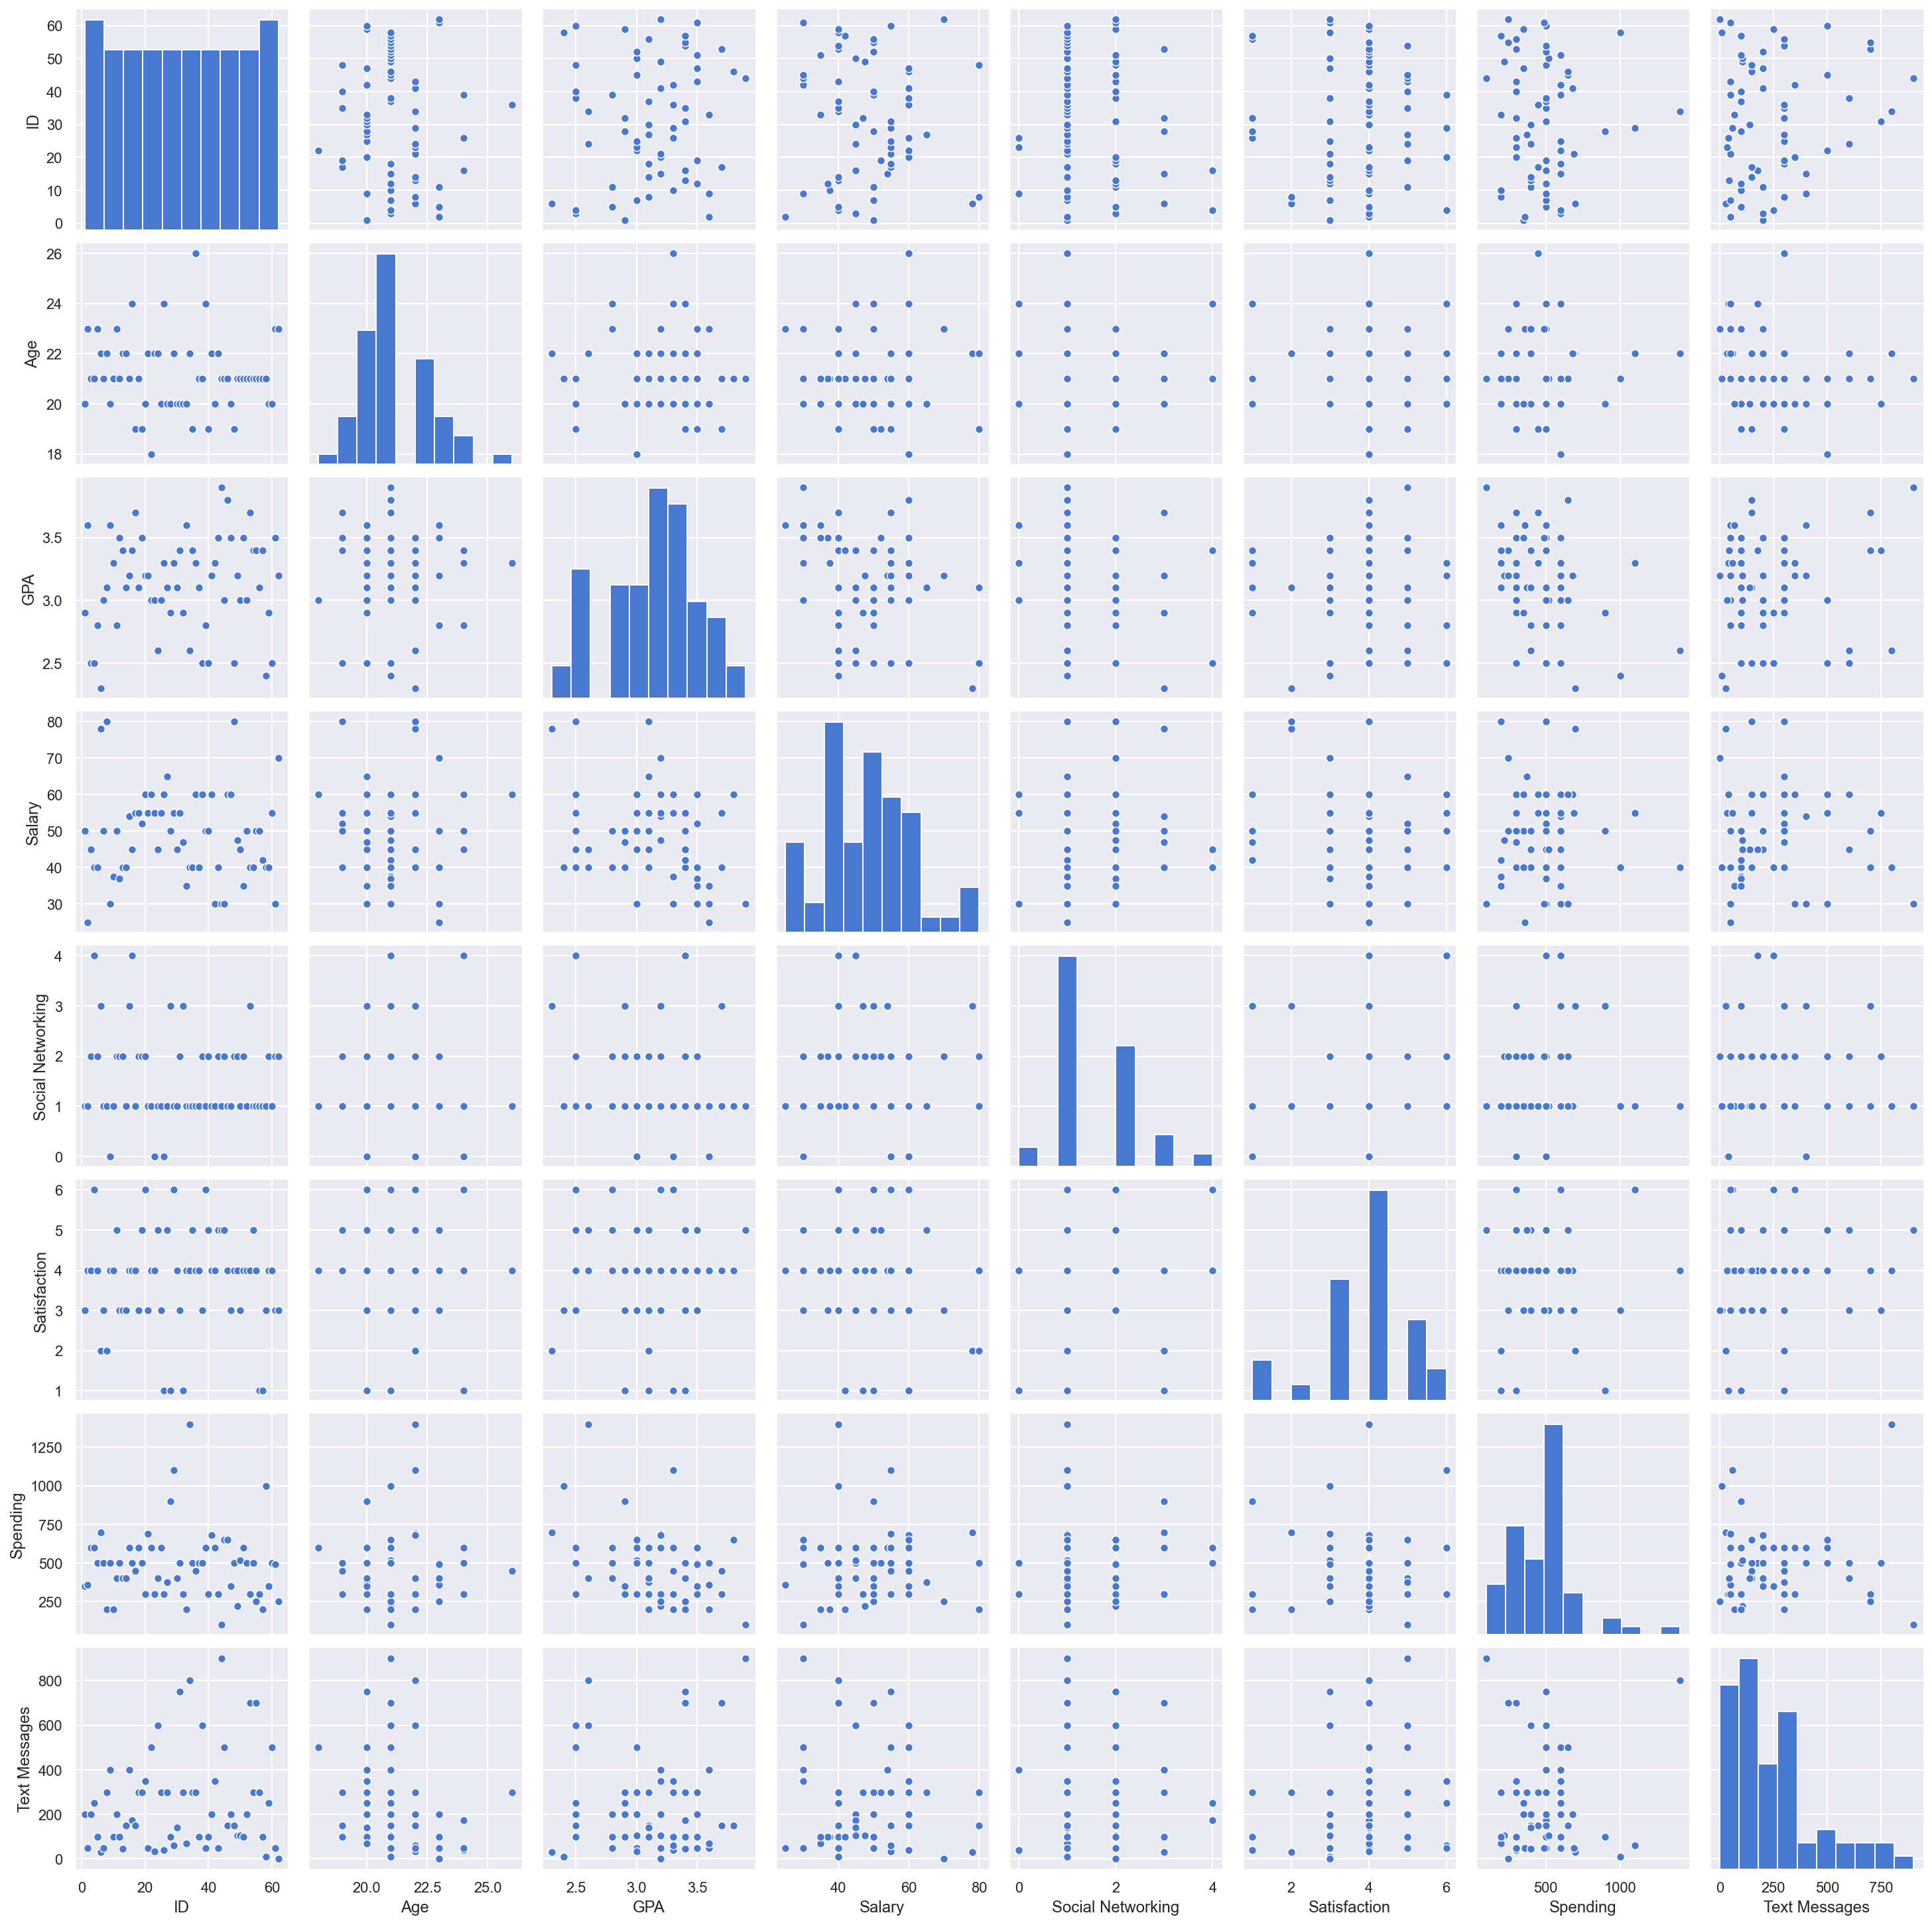

In [115]:
sns.pairplot(data=cmsu)

In [2]:
import numpy                     as     np
import pandas                    as     pd
from   scipy.stats               import ttest_1samp, ttest_ind, ttest_ind, ttest_rel
import matplotlib.pyplot         as     plt
import matplotlib
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sm
import seaborn as sns
import dataframe_image as dfi

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(color_codes=True)
sns.set_palette('muted')

%config InlineBackend.figure_format ='retina'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Problem 3 - Asphalt Shingles Moisture Content

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

### Load dataset and explore

In [6]:
shngls = pd.read_csv('A & B shingles-1.csv')
shngls.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [4]:
shngls.head().to_csv('shingles_head.csv')

In [7]:
shngls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [10]:
shngls.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


In [12]:
shngls.describe().T.to_excel('shingles_describe.xlsx')

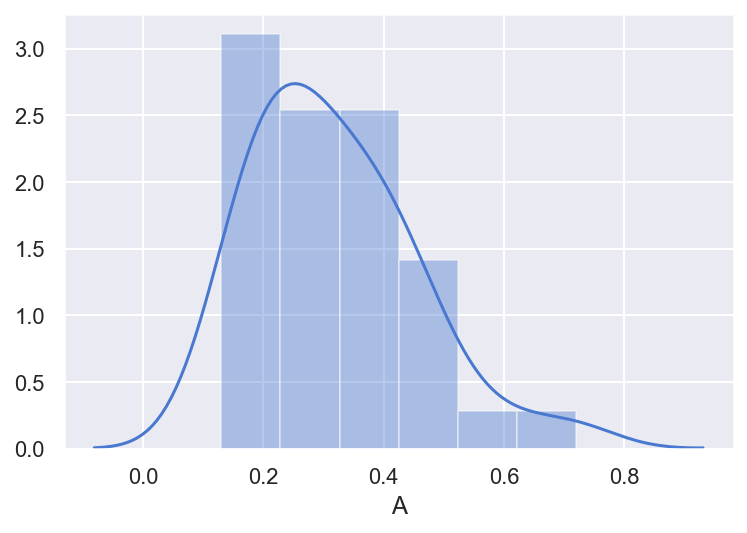

In [16]:
sns.distplot(shngls['A'] )

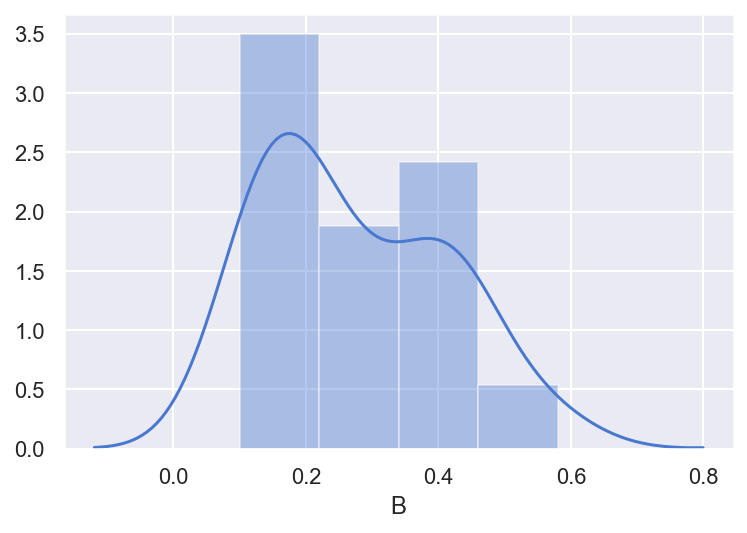

In [17]:
sns.distplot(shngls['B'] )

### Basic Understanding of data

In [31]:
print('1. Data consists of 2 types of Shingles - A and B')
print('2. Values in the data is the Moisture Content in the Shingles (in pounds per 100 square feet) ')
print('3. No. of entries of Shingles A - 36')
print('4. No. of entries of Shingles B - 31')
print()

1. Data consists of 2 types of Shingles - A and B
2. Values in the data is the Moisture Content in the Shingles (in pounds per 100 square feet) 
3. No. of entries of Shingles A - 36
4. No. of entries of Shingles B - 31


## Problem Statements
3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

### Question 3.1 :  Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

### * SHINGLES A
#### Step 1 : State NULL and ALTERNATE Hypothesis

Assuming that as status quo, Shingles A do not meet the required level of moisture content and hence we declare Null and Alternate Hypothesis as follows-

   * Null Hypothesis : $H_o$ : $\mu \geq 0.35$

   * Alternate Hypothesis : $H_a$ : $\mu < 0.35$  [Left tailed]

#### Step 2 : Decide Level of Significance

As, its not given, assuming industry standard of 95% Confidence level.
Hence,

   Level of Significance : $\alpha = 0.05$

#### Step 3 : Decide on the Test

As, Population Standard Deviation is not given/known, we cannot use Z-Test.

Hence, Using One Sample T-TEST

#### Step 4 : Calculate  t statistic and p value

In [38]:
t_statistic, p_value_2tail = ttest_1samp(shngls['A'] , 0.35)
print('One sample t test on Shingles A \nt statistic: {0} p value 2 tail: {1} '.format(t_statistic, p_value_2tail))

One sample t test on Shingles A 
t statistic: -1.4735046253382782 p value 2 tail: 0.14955266289815025 


#### Step 5 : Conclude based on the result

In [39]:
alpha_value = 0.05 # Level of significance
p_value = p_value_2tail/2
print('Level of significance: %.2f' %alpha_value)
print('')
print ("For Shingles A, Our one-sample t-test p-value for One Tail =", p_value)
print('')
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print('')

Level of significance: 0.05

For Shingles A, Our one-sample t-test p-value for One Tail = 0.07477633144907513

We have no evidence to reject the null hypothesis since p value > Level of significance



### For Shingles A, We fail to reject the Null Hypothesis.
### Hence, We Conclude that Mean Moisture Content in Shingles A is NOT within the permissible limits

### * SHINGLES B
#### Step 1 : State NULL and ALTERNATE Hypothesis

Assuming that as status quo, Shingles B do not meet the required level of moisture content and hence we declare Null and Alternate Hypothesis as follows-

   Null Hypothesis : $H_o$ : $\mu \geq 0.35$

   Alternate Hypothesis : $H_a$ : $\mu < 0.35$  [Left tailed]

#### Step 2 : Decide Level of Significance

As, its not given, assuming 95% Confidence level.
Hence,

   Level of Significance : $\alpha = 0.05$

#### Step 3 : Decide on the Test

As, Population Standard Deviation is not given/known, we cannot use Z-Test.

Hence, Using One Sample T-TEST

#### Step 4 : Calculate  t statistic and p value

In [40]:
t_statistic, p_value_2tail = ttest_1samp(shngls['B'] , 0.35, nan_policy='omit')
print('One sample t test on Shingles B \nt statistic: {0} p value 2 tail: {1} '.format(t_statistic, p_value_2tail))

One sample t test on Shingles B 
t statistic: -3.1003313069986995 p value 2 tail: 0.004180954800638365 


#### Step 5 : Conclude based on the result

In [41]:
alpha_value = 0.05 # Level of significance
p_value = p_value_2tail/2
print('Level of significance: %.2f' %alpha_value)
print('')
print ("For Shingles B, Our one-sample t-test p-value for One Tail =", p_value)
print('')
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print('')

Level of significance: 0.05

For Shingles B, Our one-sample t-test p-value for One Tail = 0.0020904774003191826

We have evidence to reject the null hypothesis since p value < Level of significance



### For Shingles B, We reject the Null Hypothesis.
### Hence, We Conclude that Mean Moisture Content in Shingles B is within the permissible limits 

### Question 3.2 : Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

#### Assumption made in 2 Sample T-Test (Independent Samples)
* Population of the Samples follow Normal Distribution


#### Step 1 : State NULL and ALTERNATE Hypothesis

Assuming that as status quo, Shingles A and B have the same Mean Moisture Content

Hence, we declare Null and Alternate Hypothesis as follows-

   * Null Hypothesis : $H_o$ : $\mu_a = \mu_b$

   * Alternate Hypothesis : $H_a$ : $\mu_a \neq \mu_b$  [Two tailed]

#### Step 2 : Decide Level of Significance

As, its not given, assuming 95% Confidence level.
Hence,

   Level of Significance : $\alpha = 0.05$

#### Step 3 : Decide on the Test

* Here, Population Standard Deviation is not given/known, we cannot use Z-Test.
* We use the t distribution and the $t_{STAT}$ test statistic for two sample unpaired test.
* Here, Sample sizes are not same, hence the equal variance t-statistic is no longer equal to the unequal variance t-statistic: \
We set equal_var = False

#### Step 4 : Calculate  t statistic and p value

** We use the scipy.stats.ttest_ind to calculate the t-test for the means of TWO INDEPENDENT samples of moisture content given the two sample observations of Shingles A and B. This function returns t statistic and two-tailed p value.**

** This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.**

** But here, We have UNEQUAL Variances, hence we set equal_var=False **

In [51]:
t_statistic, p_value  = ttest_ind(shngls['A'], shngls['B'], equal_var=False, nan_policy='omit')
print('t stat =',t_statistic)    
print('p value 2 tail =',p_value)    

t stat = 1.2885080295255027
p value 2 tail = 0.2022582205021782


#### Step 5 : Conclude based on the result

In [58]:
# p_value < 0.05 => alternate hypothesis:
# they don't have the same mean at the 5% level of significance
print ("Two-Sample t-test p-value =", p_value)
print('')

alpha = 0.05

if p_value < alpha:
    print('We have enough evidence to reject the Null Hypothesis in favour of Alternate Hypothesis')
    print('')
    print('We conclude that the mean Moisture Content in the Two samples of Shingles A and B are NOT same.')
else:
    print('We do not have enough evidence to reject the Null Hypothesis in favour of Alternate Hypothesis')
    print('')
    print('We conclude that the mean Moisture Content in the Two samples of Shingles A and B are same.')

Two-Sample t-test p-value = 0.2022582205021782

We do not have enough evidence to reject the Null Hypothesis in favour of Alternate Hypothesis

We conclude that the mean Moisture Content in the Two samples of Shingles A and B are same.


### Hence, We Conclude that Mean Moisture Content in Shingles A and B is same.